In [1]:
import  pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("data/stud.csv")

df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
df.shape

(1000, 8)

In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [7]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [11]:
print("cateorical feature in 'gender' variable ", end="")
print(df['gender'].unique())

print("cateorical feature in 'race_ethnicity' variable ", end="")
print(df['race_ethnicity'].unique())


print("cateorical feature in 'parental level of education' variable ", end="")
print(df['parental_level_of_education'].unique())


print("cateorical feature in 'lunch' variable ", end="")
print(df['lunch'].unique())


print("cateorical feature in 'test preparation course' variable ", end="")
print(df['test_preparation_course'].unique())

cateorical feature in 'gender' variable ['female' 'male']
cateorical feature in 'race_ethnicity' variable ['group B' 'group C' 'group A' 'group D' 'group E']
cateorical feature in 'parental level of education' variable ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
cateorical feature in 'lunch' variable ['standard' 'free/reduced']
cateorical feature in 'test preparation course' variable ['none' 'completed']


In [14]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_feature=[feature for feature in df.columns if df[feature].dtype=="O"]

print("we have {} numerical features {} ".format(len(numerical_feature),numerical_feature))
print("we have {} categorical feature {} ".format(len(categorical_feature), categorical_feature))

we have 3 numerical features ['math_score', 'reading_score', 'writing_score'] 
we have 5 categorical feature ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] 


In [15]:
# adding  "total score" and "average"

In [16]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average']  = df['total_score']

df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score  average  
0          218      218  
1          247      247  
2          278      278  
3          148      148  
4          229      229

In [17]:
full_mark_math_score = df[df['math_score']==100]['average'].count()
full_mark_reading_score = df[df['reading_score']==100]['average'].count()
full_mark_writing_score = df[df['writing_score']==100]['average'].count()

print(f"student has full mark in math score: {full_mark_math_score}")
print(f"student has full mark in reading score: {full_mark_reading_score}")
print(f"student has full mark in writing score: {full_mark_writing_score} ")

student has full mark in math score: 7
student has full mark in reading score: 17
student has full mark in writing score: 14 


In [18]:
less_then_20_mark_math_score = df[df['math_score']<20]['average'].count()
less_then_20_mark_reading_score = df[df['reading_score']<20]['average'].count()
less_then_20_mark_writing_score = df[df['writing_score']<20]['average'].count()

print(f"student has less then 20 mark in math score: {less_then_20_mark_math_score}")
print(f"student has less then 20 mark in reading score:{less_then_20_mark_reading_score}")
print(f"student has less then 20 mark in writing score: {less_then_20_mark_writing_score}")

student has less then 20 mark in math score: 4
student has less then 20 mark in reading score:1
student has less then 20 mark in writing score: 3


In [19]:
# Data visulatian 
# Kde - Karnel Density function


C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

<Axes: xlabel='total_score', ylabel='Count'>

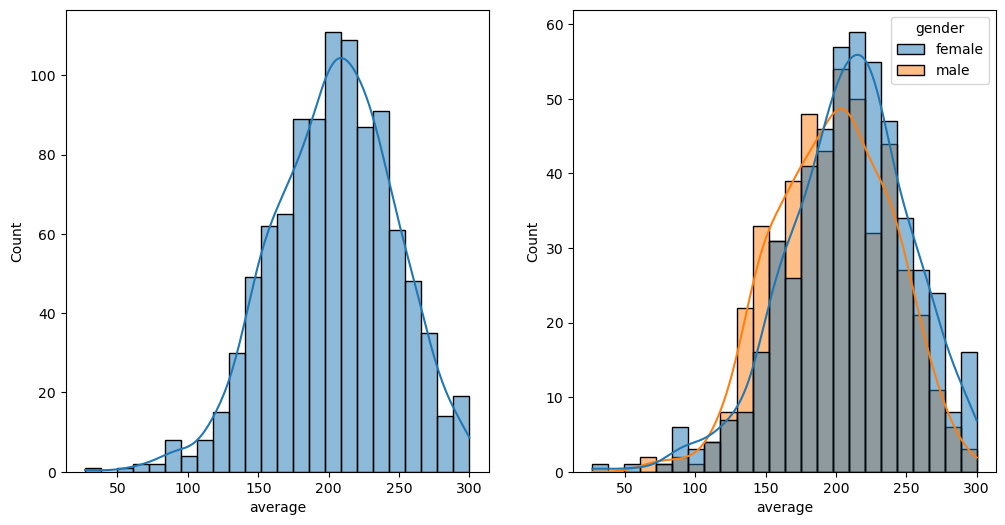

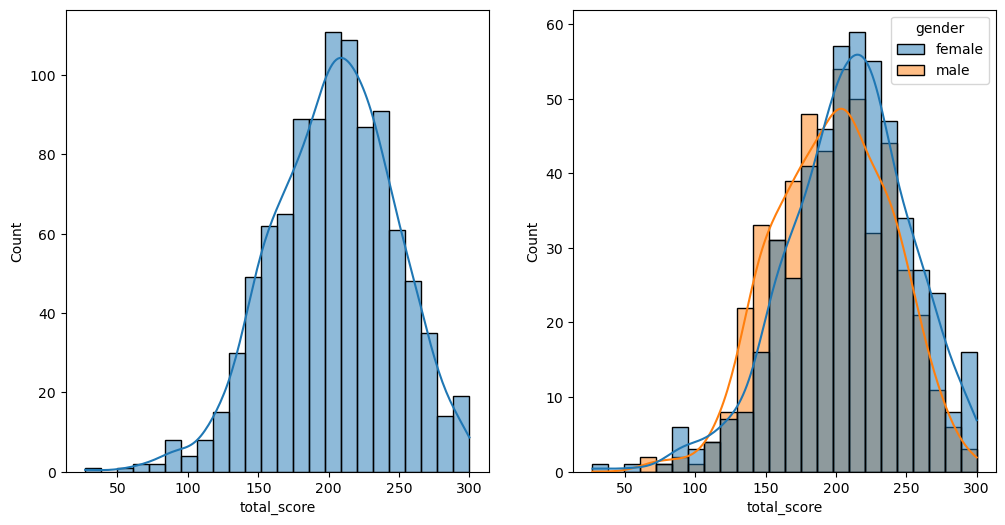

In [23]:
fig,axes = plt.subplots(1,2, figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df, x="average", kde=True)
plt.subplot(122)
sns.histplot(data=df, x="average", kde=True, hue='gender')

print("===============================================================================================================")

fig,axes = plt.subplots(1,2, figsize=(12,6))
plt.subplot(121)
sns.histplot(data=df, x="total_score", kde=True)
plt.subplot(122)
sns.histplot(data=df, x="total_score", kde=True, hue='gender')

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_score', ylabel='Count'>

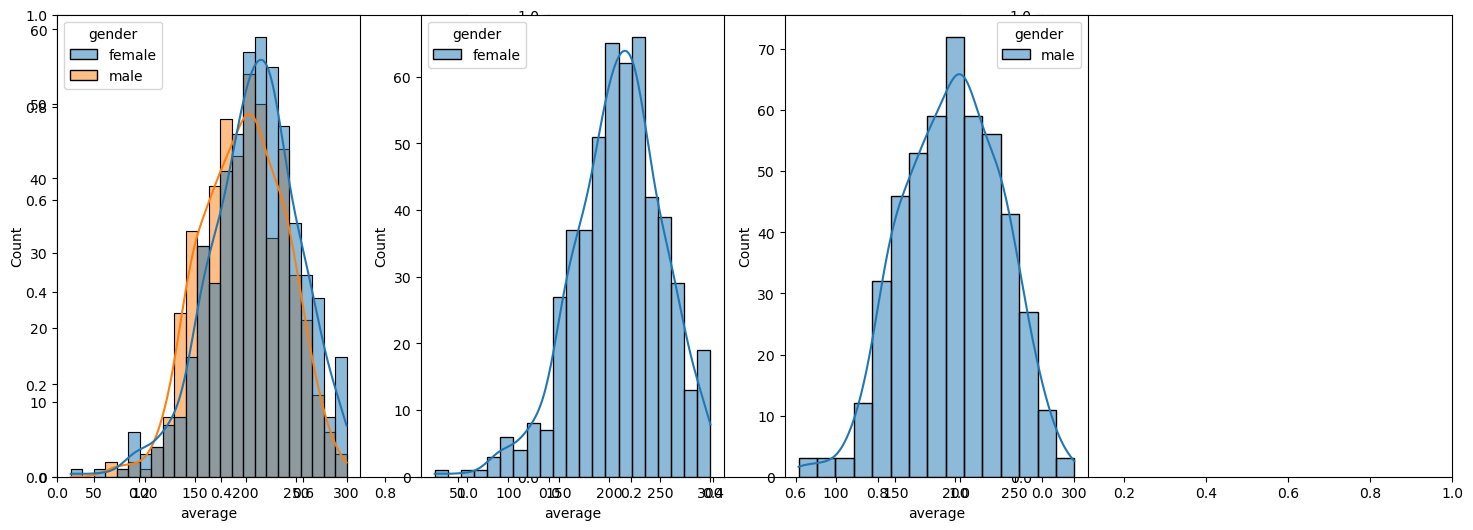

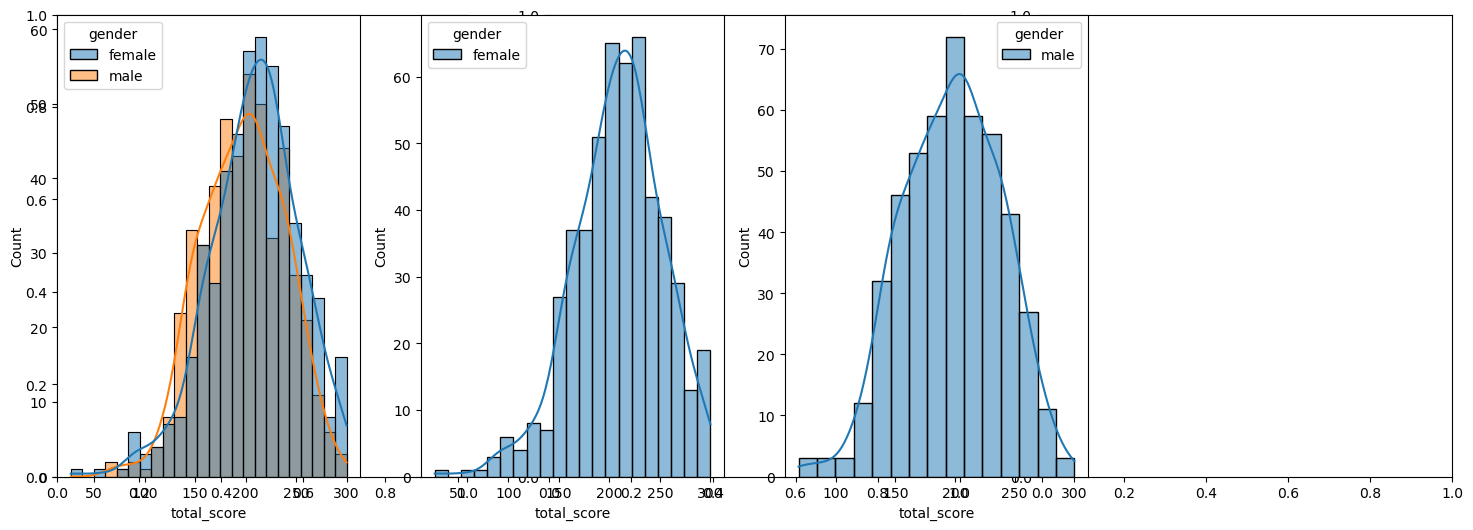

In [30]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue='gender')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="average", kde=True, hue='gender')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="average", kde=True, hue='gender')

print("===============================================================================================================")

plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="total_score", kde=True, hue='gender')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="total_score", kde=True, hue='gender')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="total_score", kde=True, hue='gender')

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_score', ylabel='Count'>

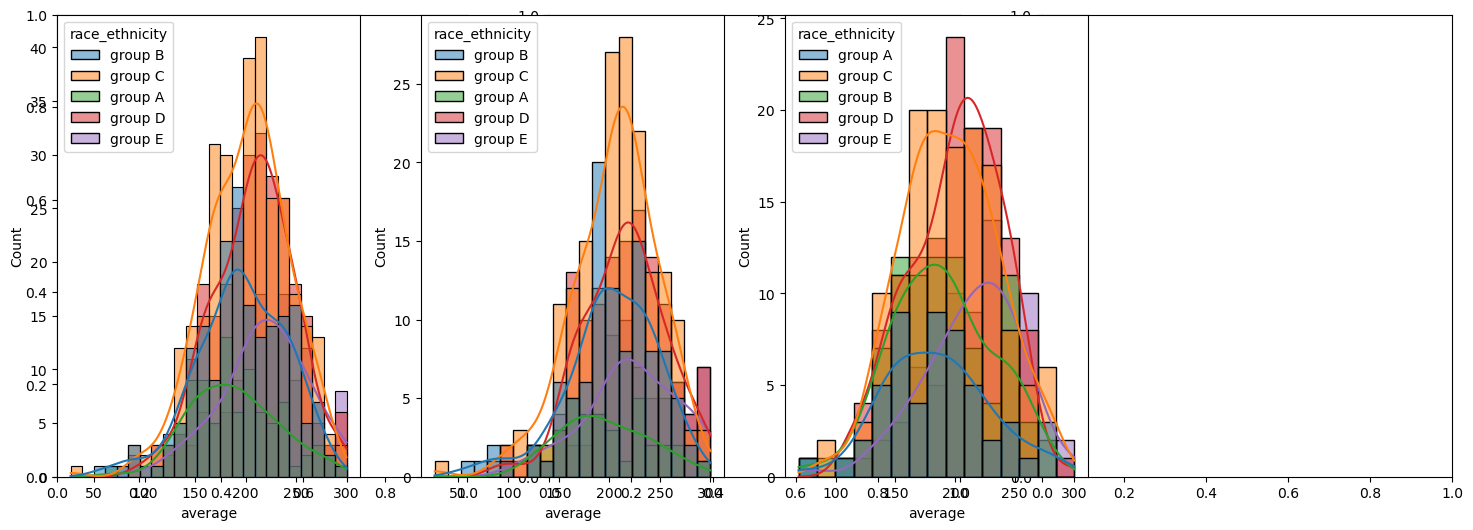

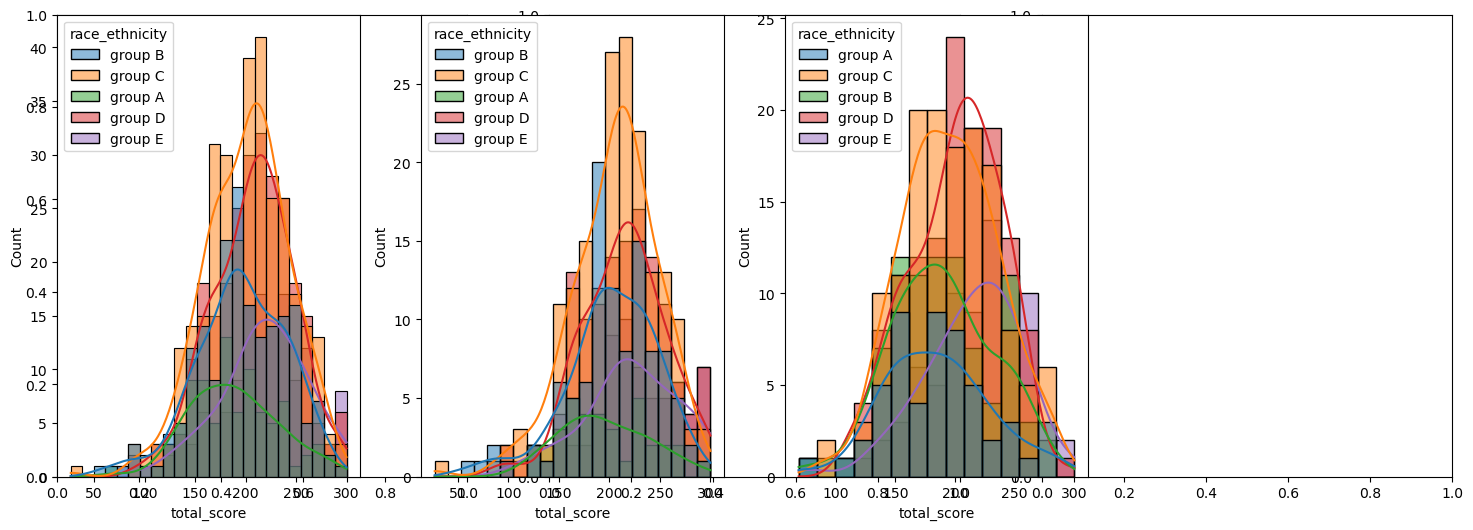

In [31]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="average", kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="average", kde=True, hue='race_ethnicity')

print("===============================================================================================================")

plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="total_score", kde=True, hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="total_score", kde=True, hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="total_score", kde=True, hue='race_ethnicity')

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_score', ylabel='Count'>

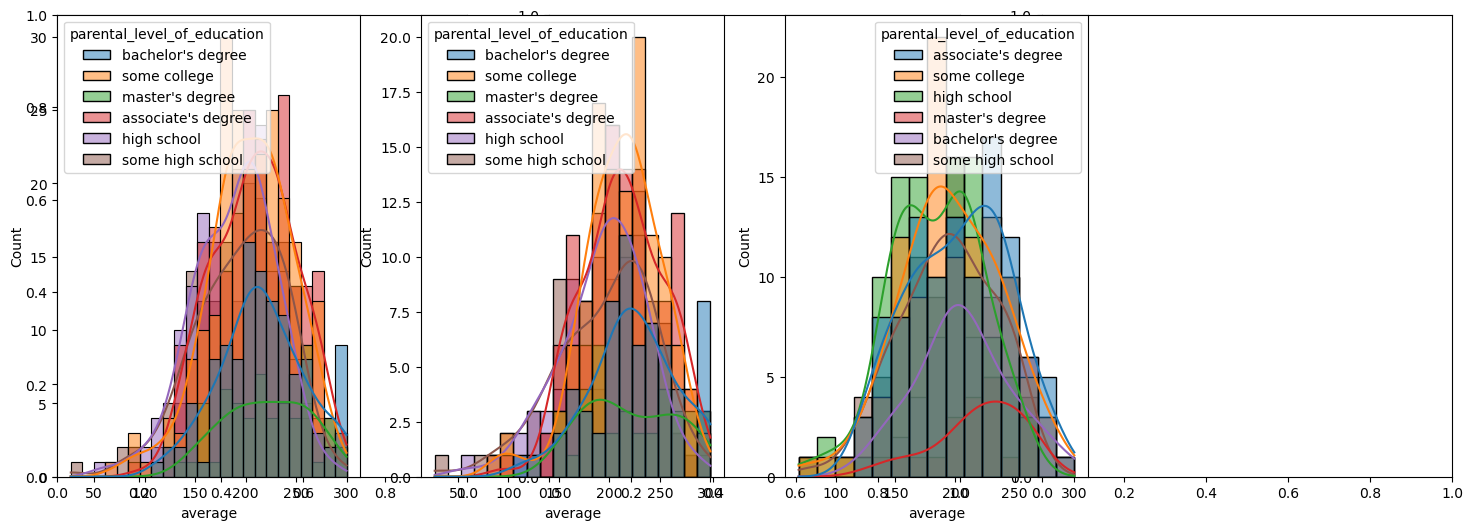

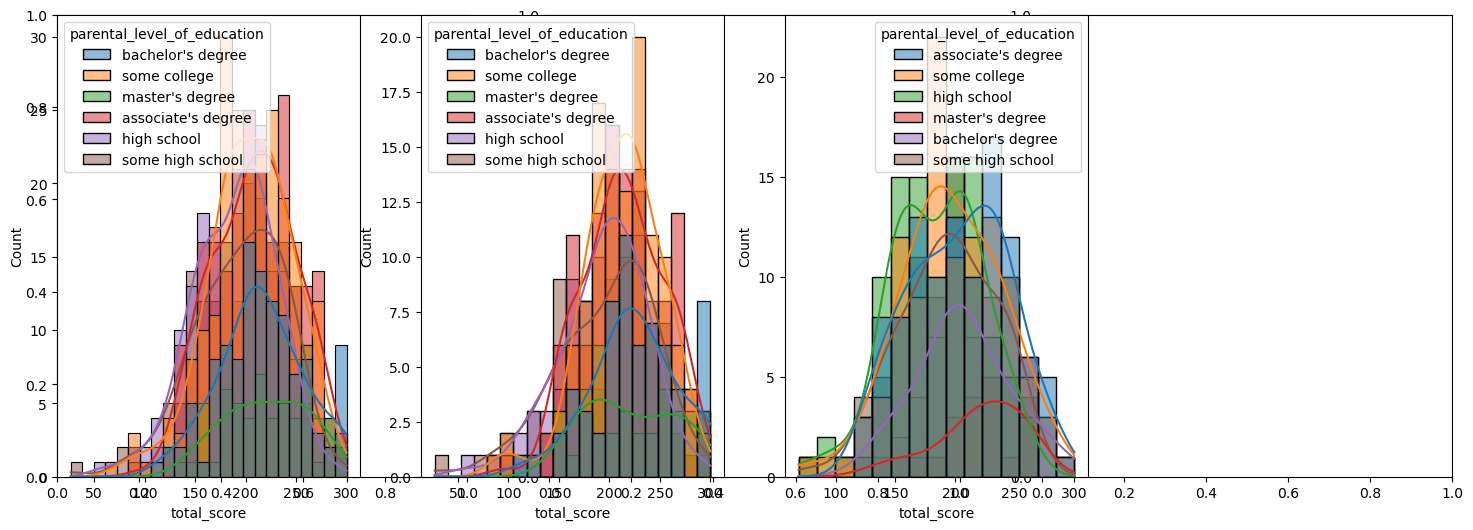

In [32]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="average", kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="average", kde=True, hue='parental_level_of_education')

print("===============================================================================================================")

plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="total_score", kde=True, hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="total_score", kde=True, hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="total_score", kde=True, hue='parental_level_of_education')

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_score', ylabel='Count'>

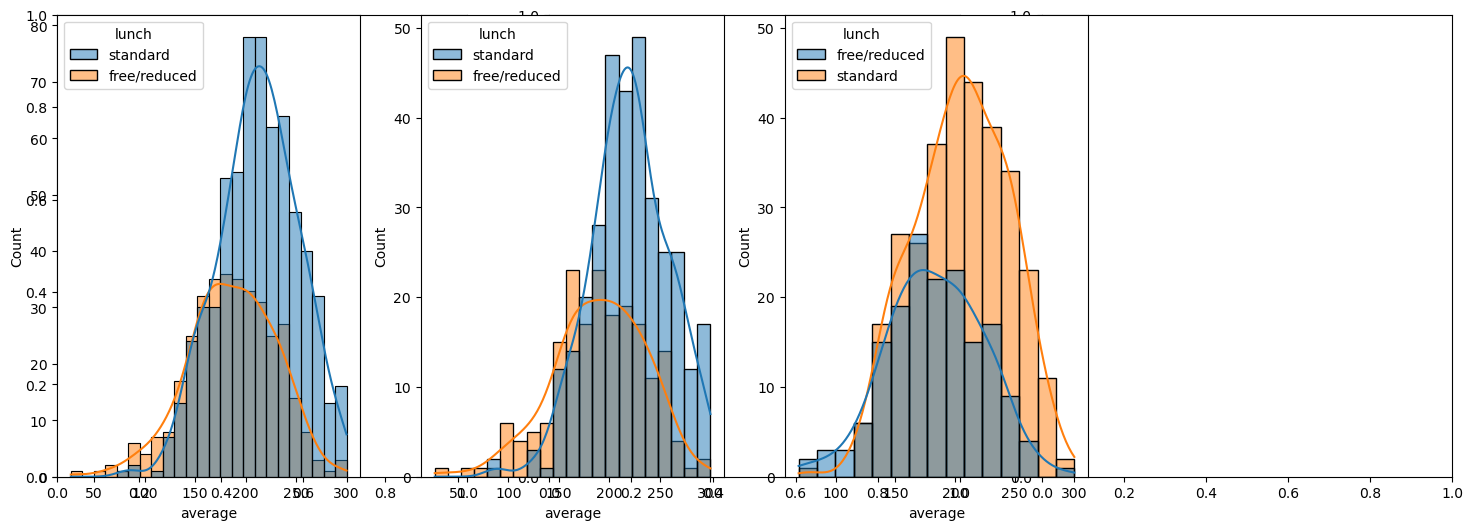

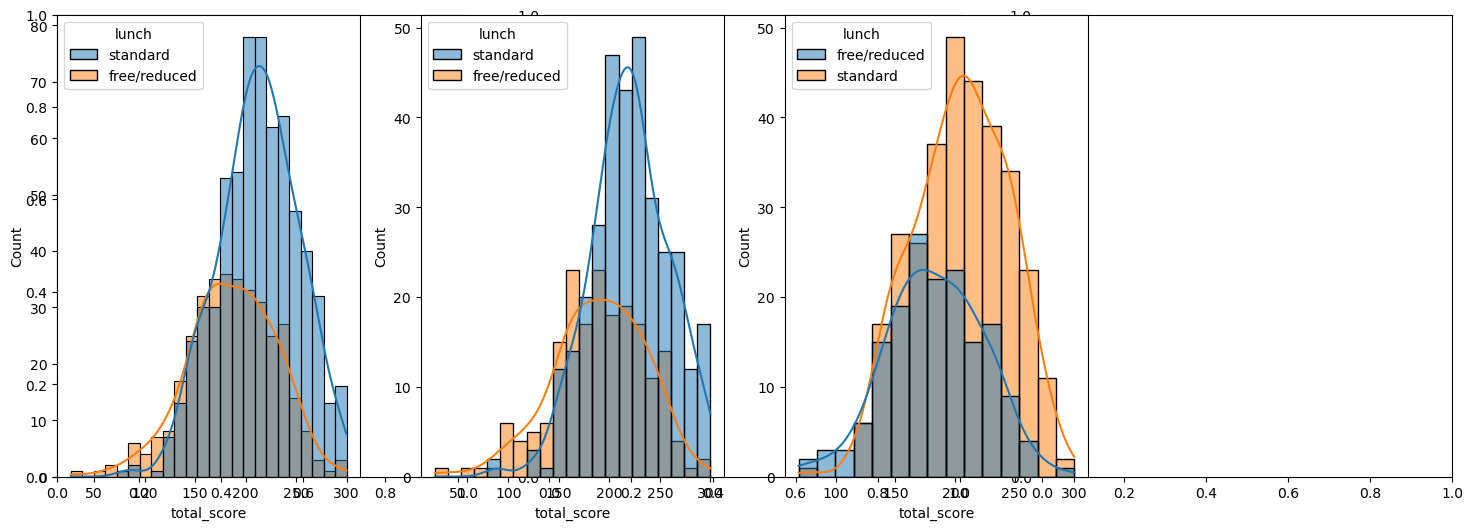

In [33]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="average", kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="average", kde=True, hue='lunch')

print("===============================================================================================================")

plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="total_score", kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="total_score", kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="total_score", kde=True, hue='lunch')

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_score', ylabel='Count'>

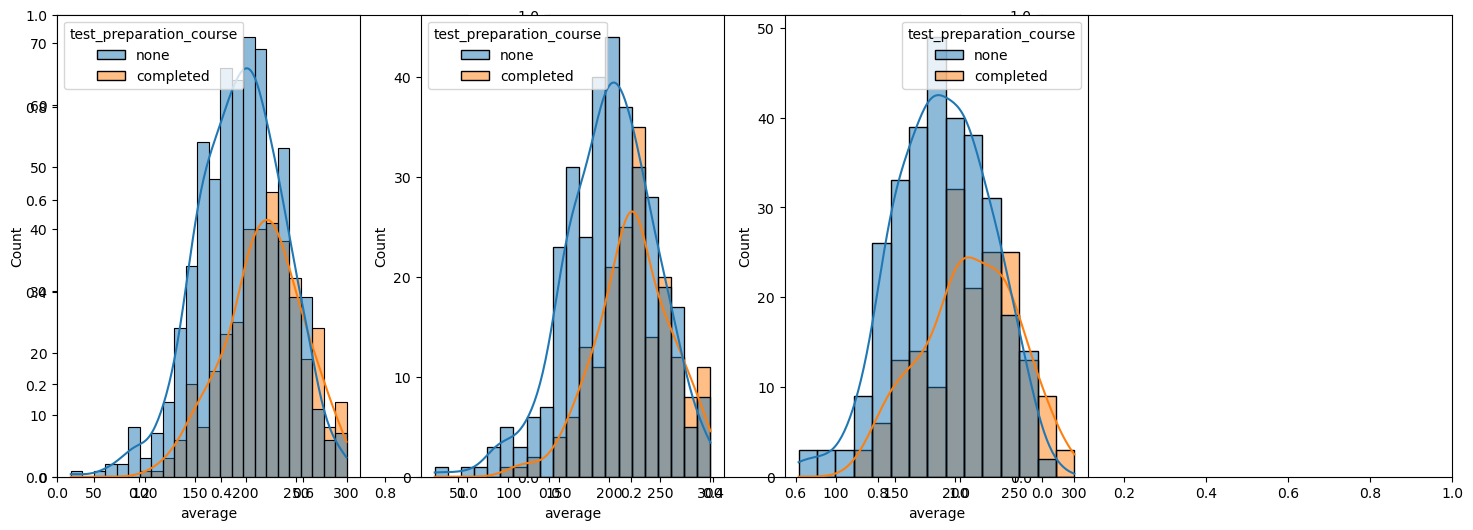

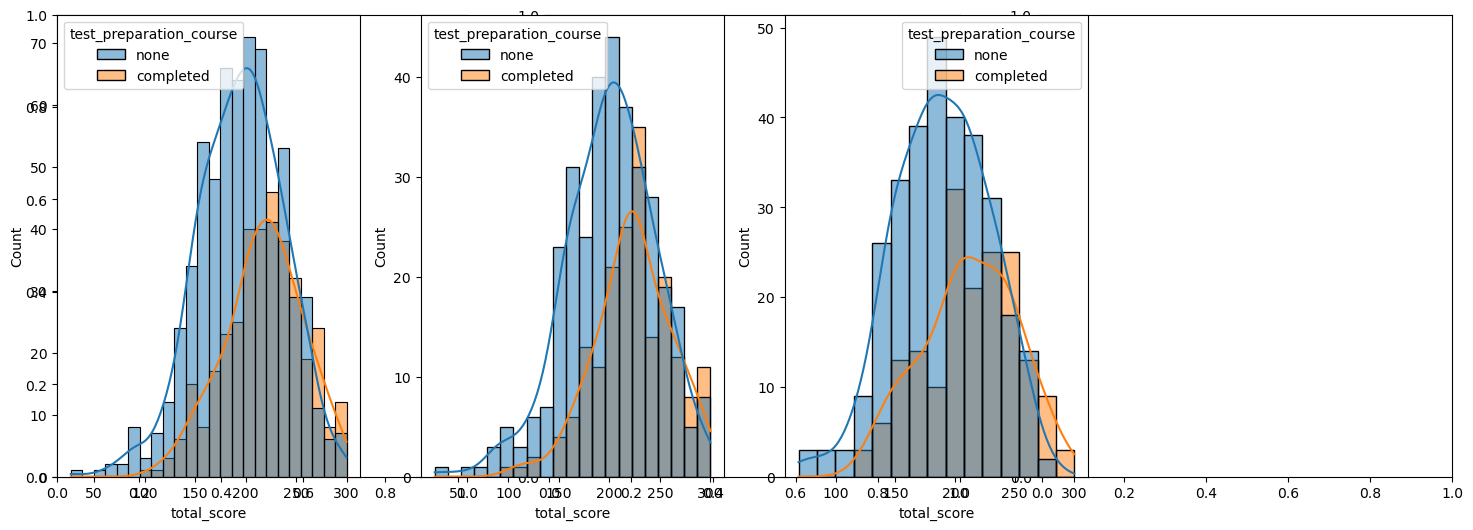

In [34]:
plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="average", kde=True, hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="average", kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="average", kde=True, hue='test_preparation_course')

print("===============================================================================================================")

plt.subplots(1,3, figsize=(18,6))

plt.subplot(141)
sns.histplot(data=df, x="total_score", kde=True, hue='test_preparation_course')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x="total_score", kde=True, hue='test_preparation_course')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x="total_score", kde=True, hue='test_preparation_course')

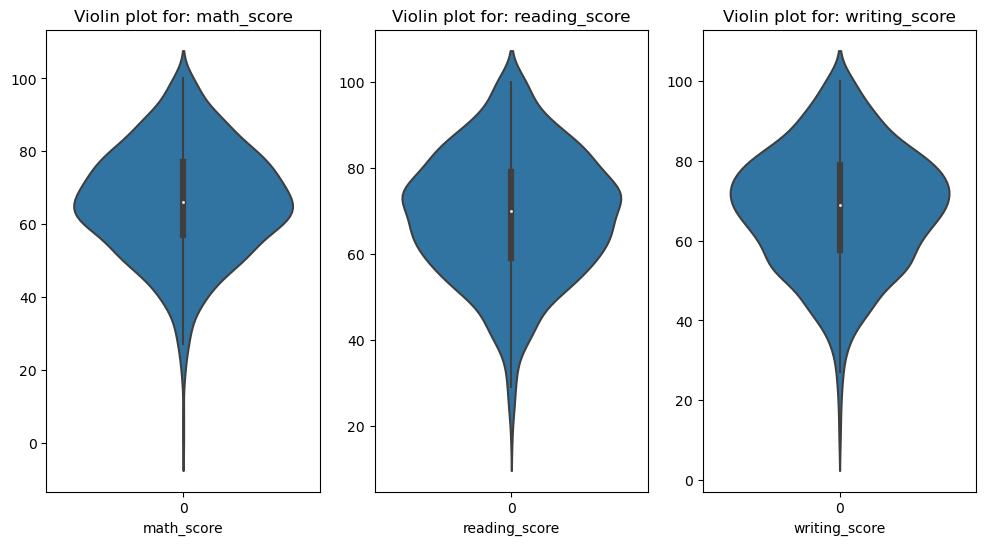

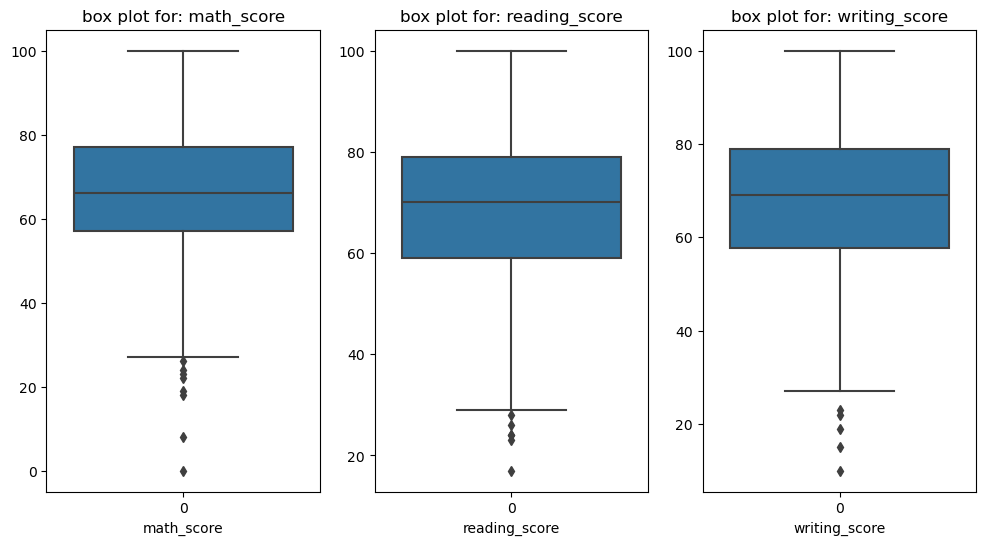

In [38]:
numerical_features=df[['math_score', 'reading_score','writing_score']]

plt.figure(figsize=(12,6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1,3, i+1)
    sns.violinplot(df[feature])
    plt.title(f"Violin plot for: {feature}")
    plt.xlabel(feature)

print("===========================================================================================================================")

plt.figure(figsize=(12,6))
for i, feature in enumerate(numerical_features):
    plt.subplot(1,3, i+1)
    sns.boxplot(df[feature])
    plt.title(f"box plot for: {feature}")
    plt.xlabel(feature)
  

In [39]:
# ploting each each categorical feature

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


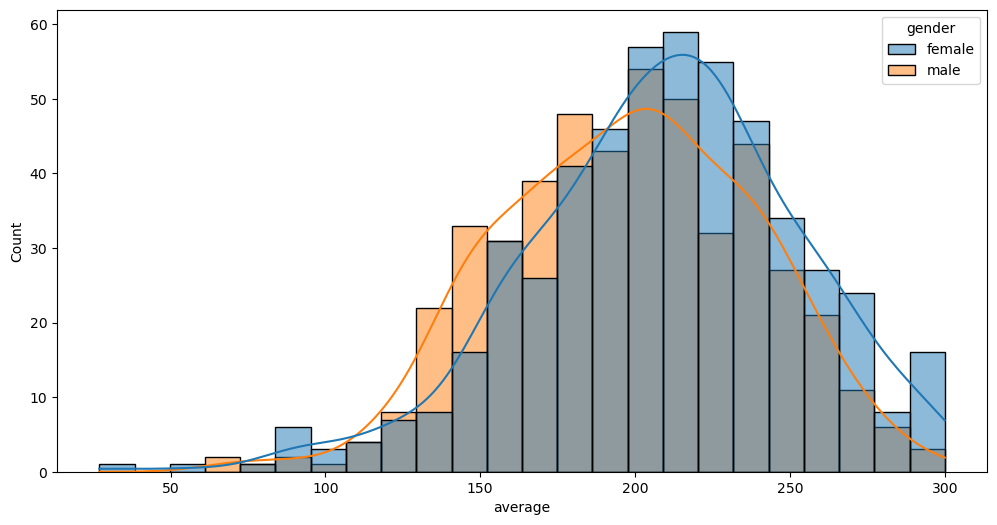

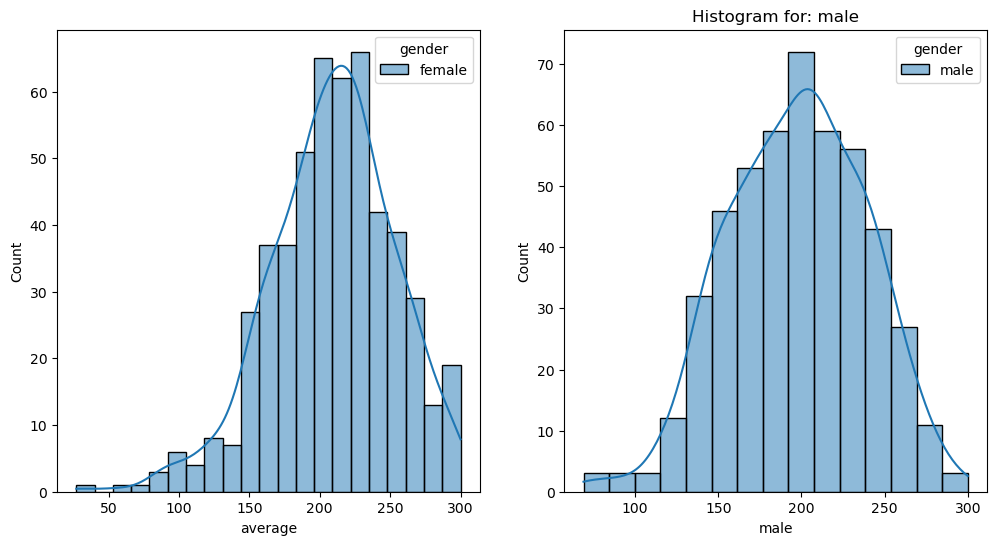

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


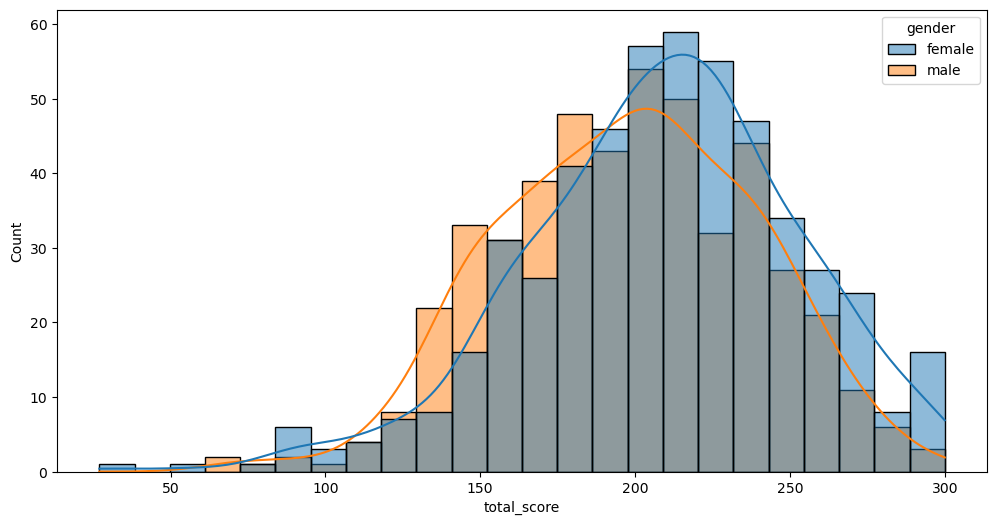

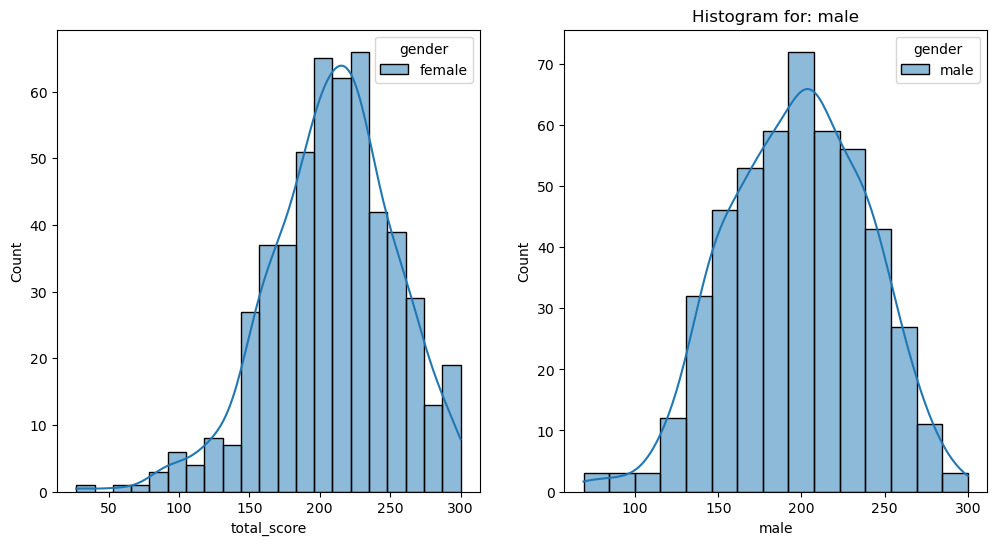

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="average", kde=True,hue='gender')

fig, axes = plt.subplots(1,2 ,figsize=(12,6))
for i, group in enumerate(df['gender'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['gender']==group], x="average", kde=True, ax=ax, hue='gender')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()

print("========================================================================================================================")

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="total_score", kde=True,hue='gender')

fig, axes = plt.subplots(1,2 ,figsize=(12,6))
for i, group in enumerate(df['gender'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['gender']==group], x="total_score", kde=True, ax=ax, hue='gender')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()
    
    

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

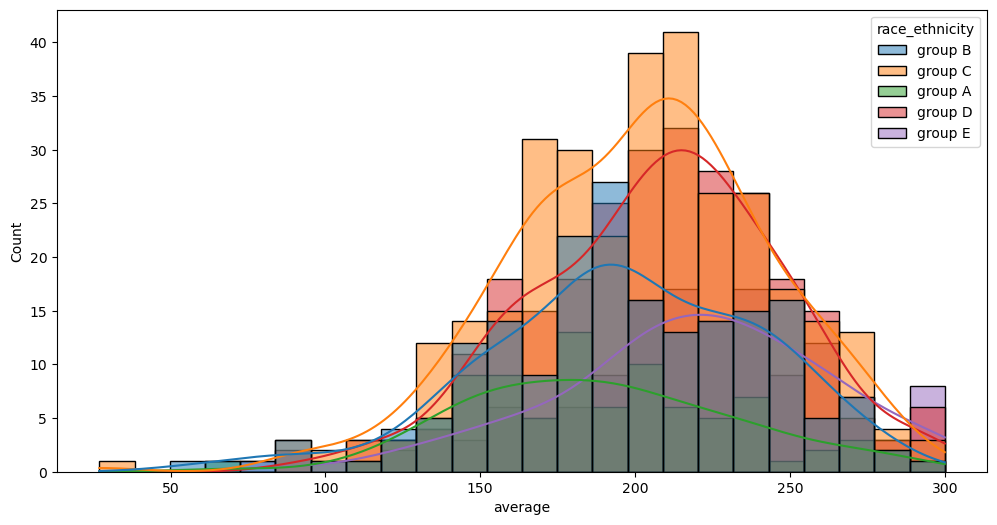

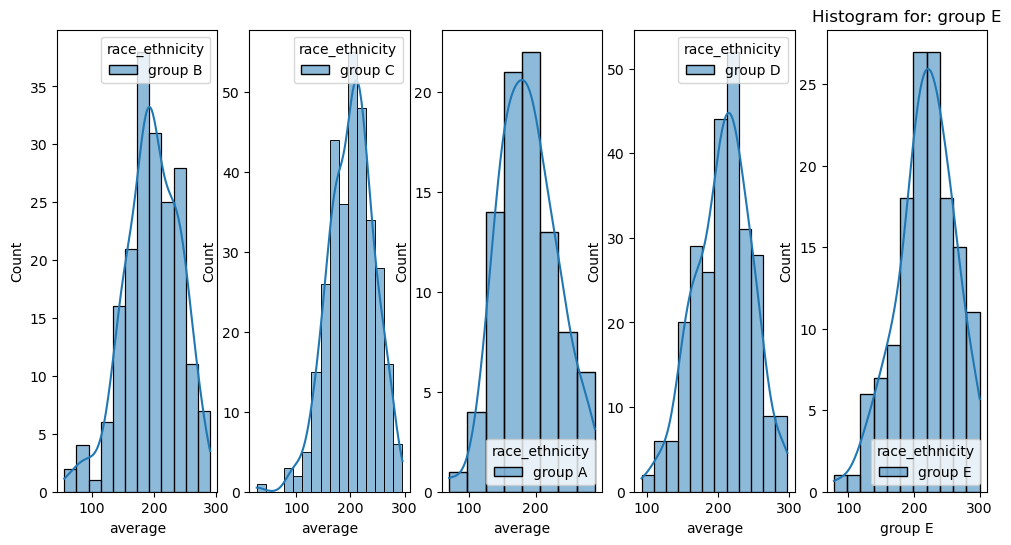

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

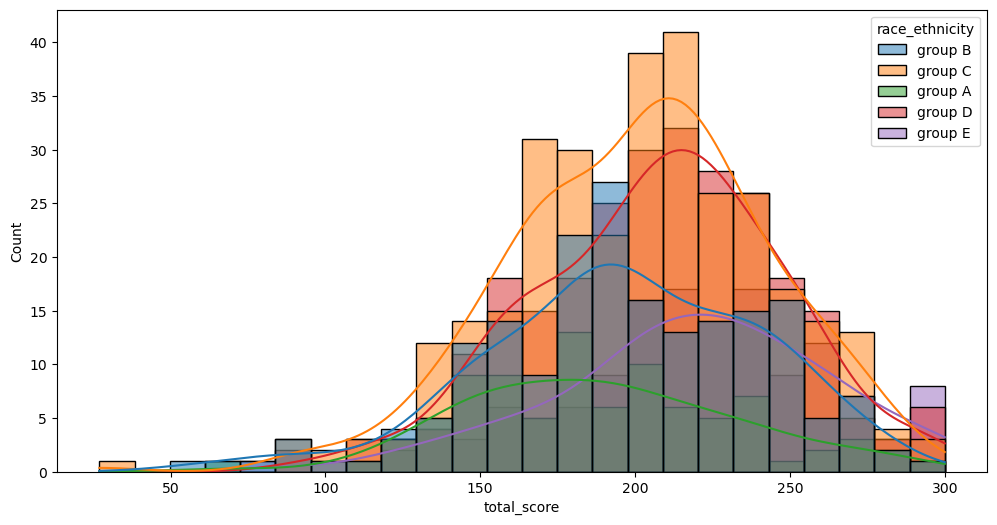

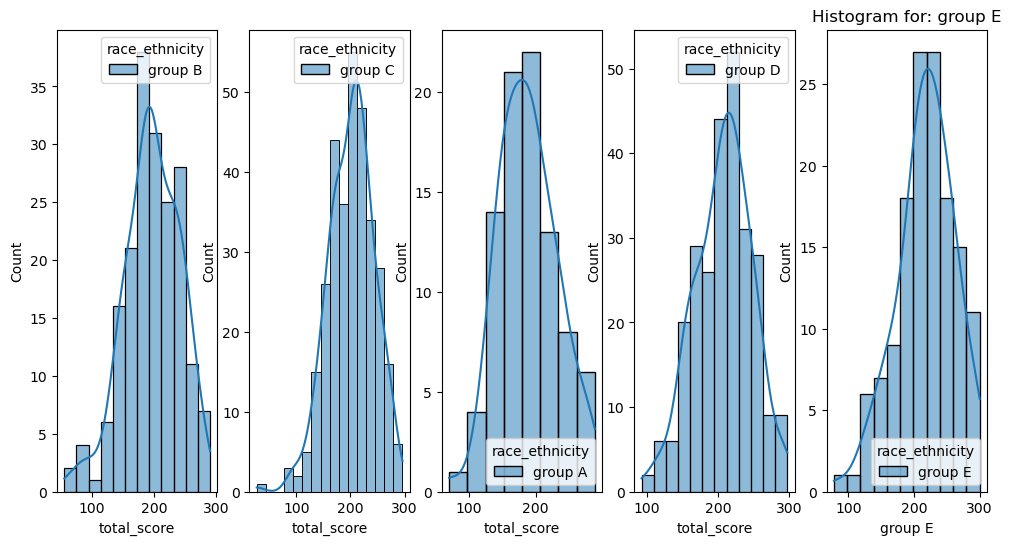

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="average", kde=True,hue='race_ethnicity')

fig, axes = plt.subplots(1,5 ,figsize=(12,6))
for i, group in enumerate(df['race_ethnicity'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['race_ethnicity']==group], x="average", kde=True, ax=ax, hue='race_ethnicity')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()

print("========================================================================================================================")

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="total_score", kde=True,hue='race_ethnicity')

fig, axes = plt.subplots(1,5 ,figsize=(12,6))
for i, group in enumerate(df['race_ethnicity'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['race_ethnicity']==group], x="total_score", kde=True, ax=ax, hue='race_ethnicity')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()
    
    

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

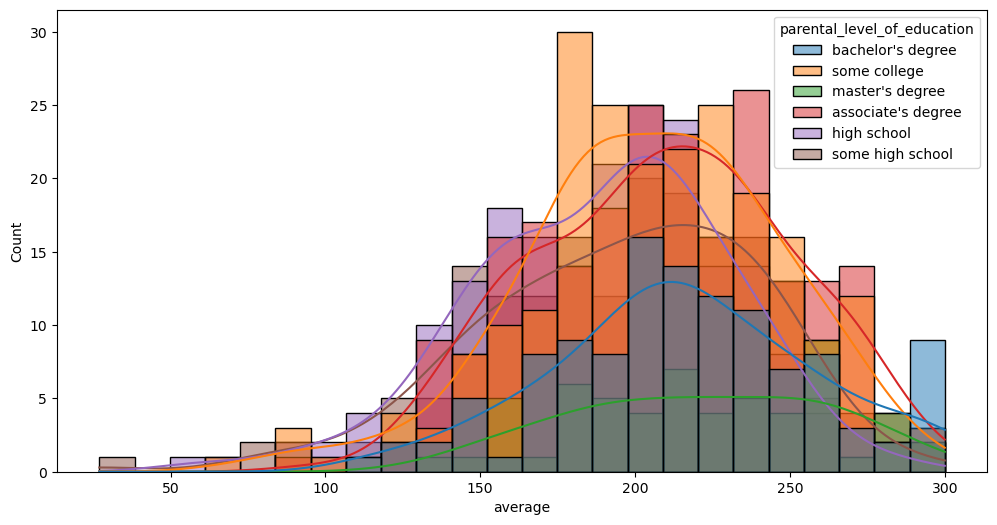

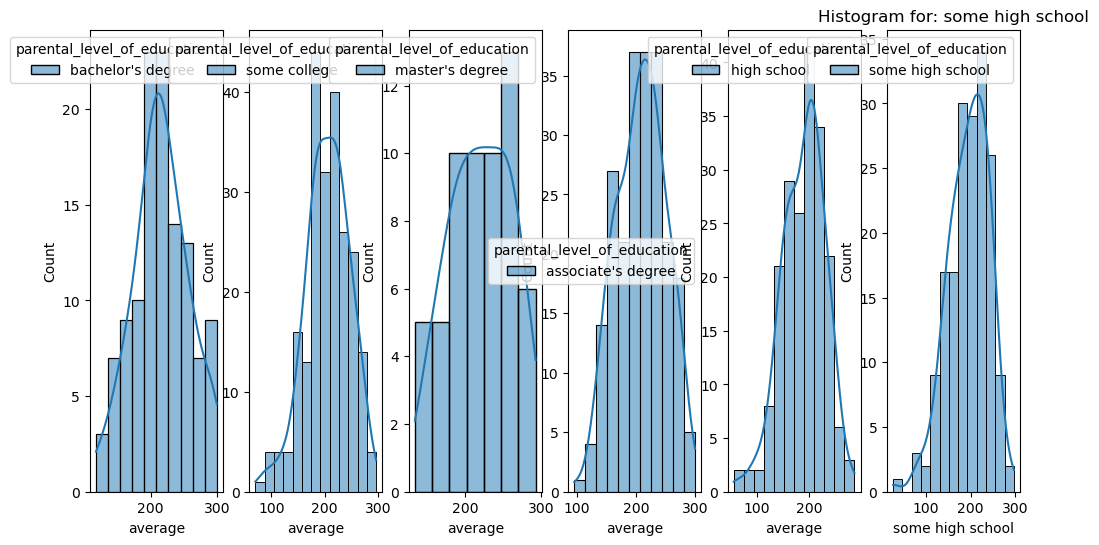

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

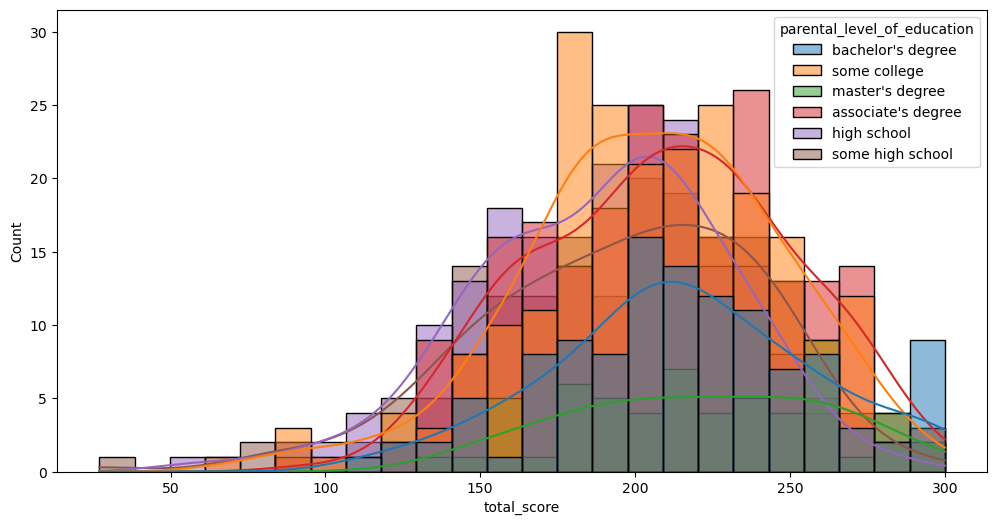

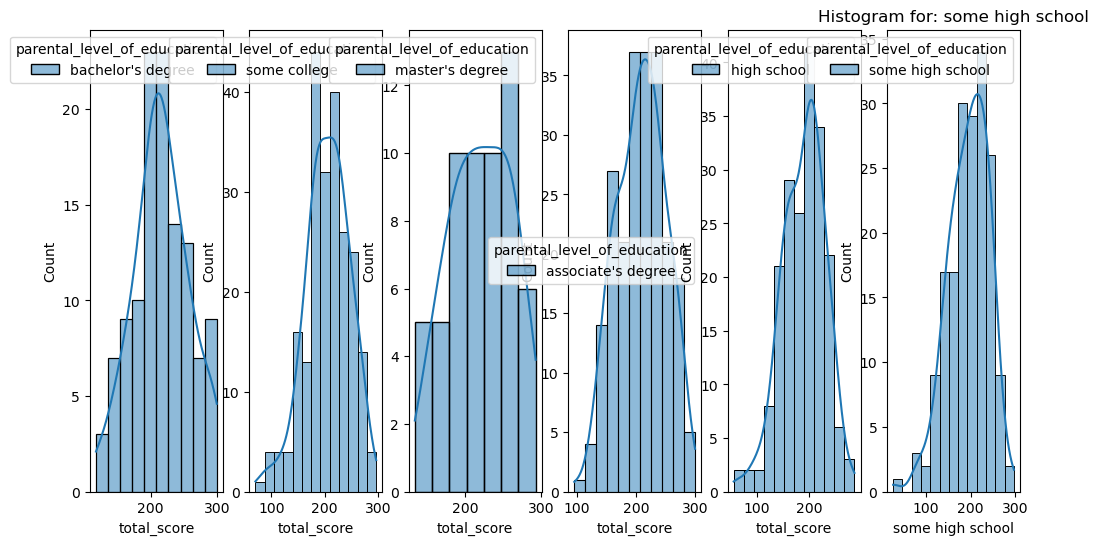

In [53]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="average", kde=True,hue='parental_level_of_education')

fig, axes = plt.subplots(1,6,figsize=(12,6))
for i, group in enumerate(df['parental_level_of_education'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['parental_level_of_education']==group], x="average", kde=True, ax=ax, hue='parental_level_of_education')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()

print("========================================================================================================================")

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="total_score", kde=True,hue='parental_level_of_education')

fig, axes = plt.subplots(1,6 ,figsize=(12,6))
for i, group in enumerate(df['parental_level_of_education'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['parental_level_of_education']==group], x="total_score", kde=True, ax=ax, hue='parental_level_of_education')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()
    
    

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


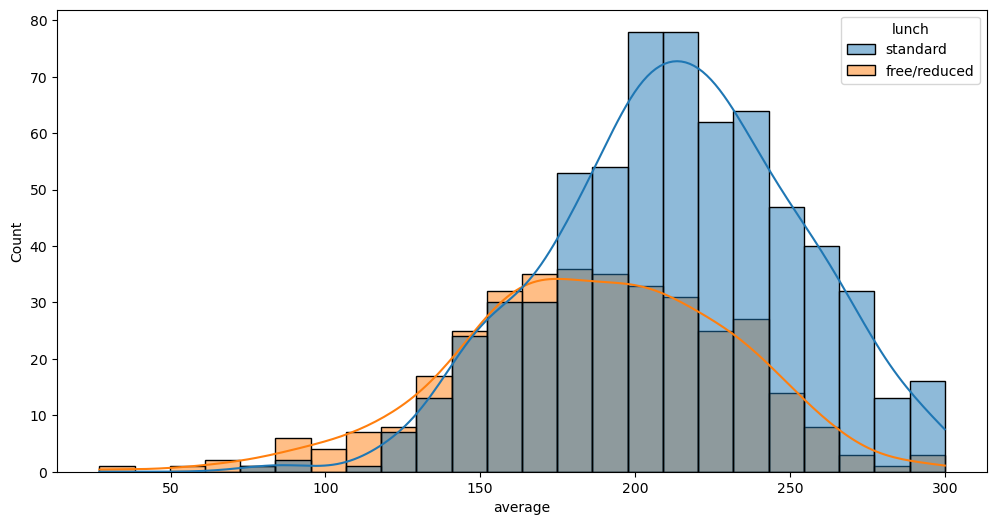

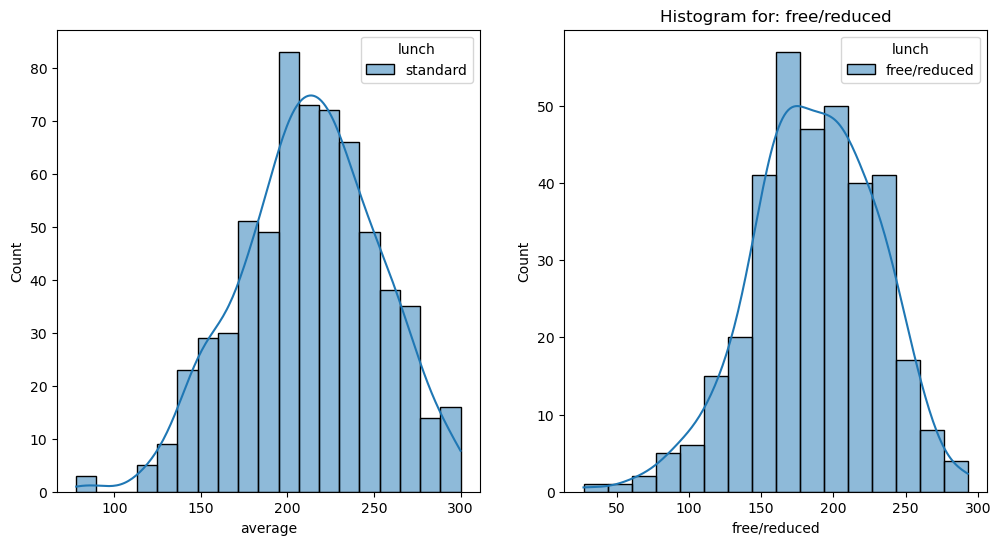

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


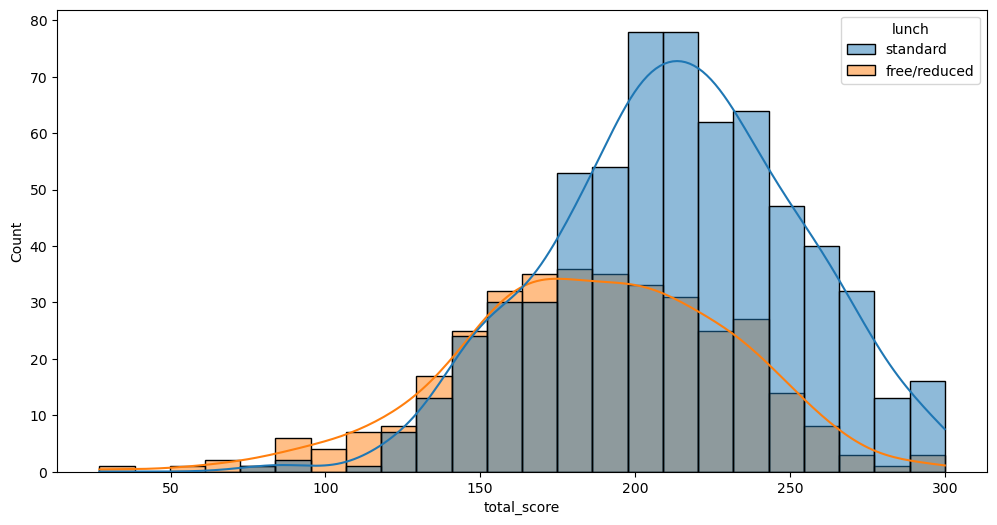

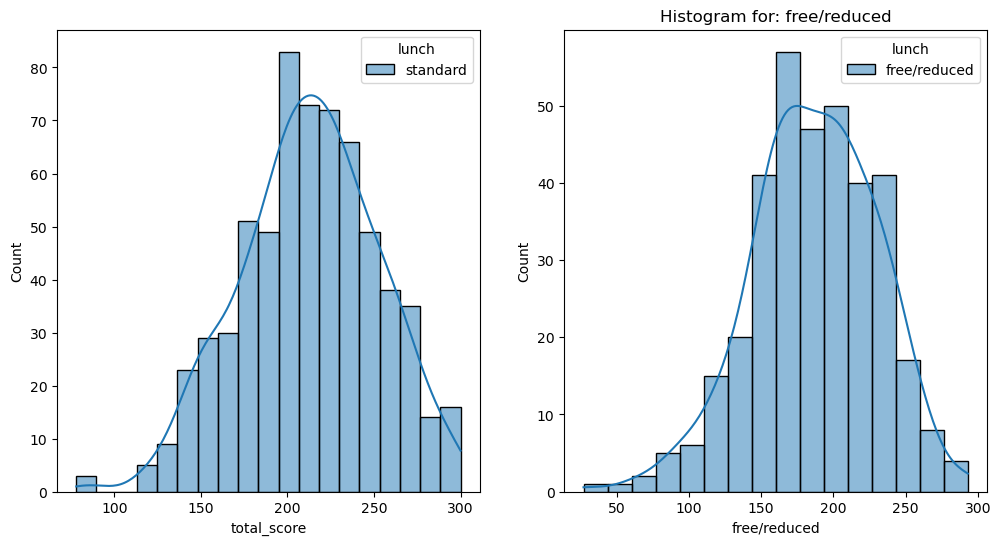

In [55]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="average", kde=True,hue='lunch')

fig, axes = plt.subplots(1,2,figsize=(12,6))
for i, group in enumerate(df['lunch'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['lunch']==group], x="average", kde=True, ax=ax, hue='lunch')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()

print("========================================================================================================================")

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="total_score", kde=True,hue='lunch')

fig, axes = plt.subplots(1,2 ,figsize=(12,6))
for i, group in enumerate(df['lunch'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['lunch']==group], x="total_score", kde=True, ax=ax, hue='lunch')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()
    
    

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


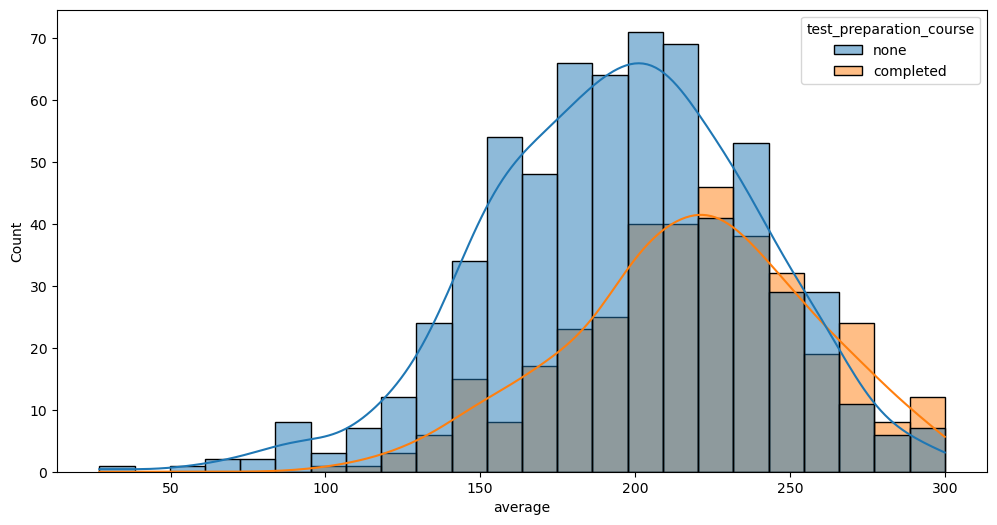

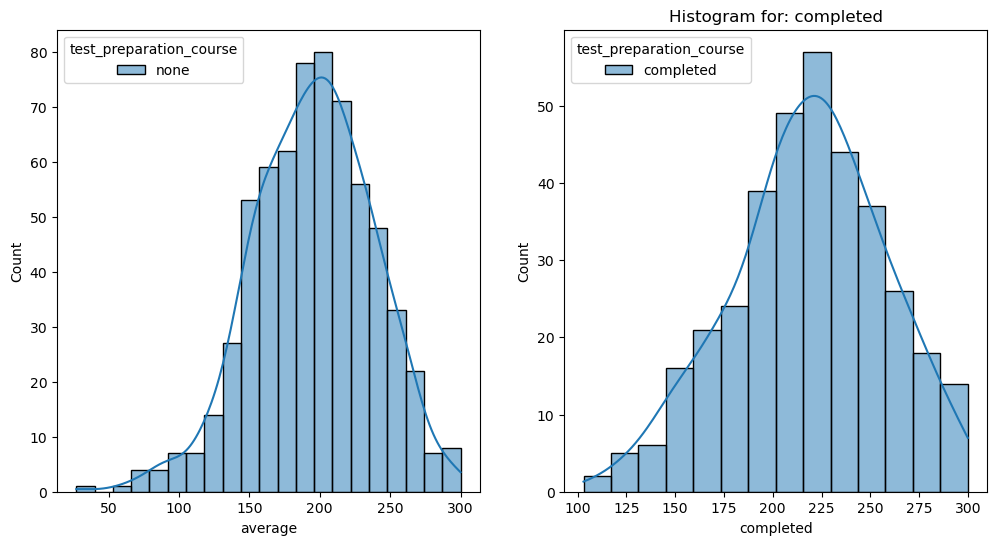

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


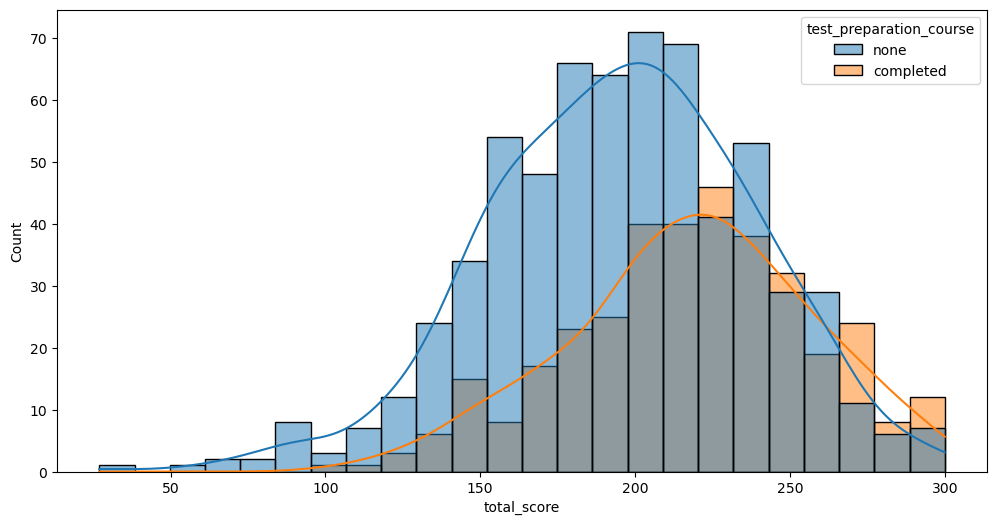

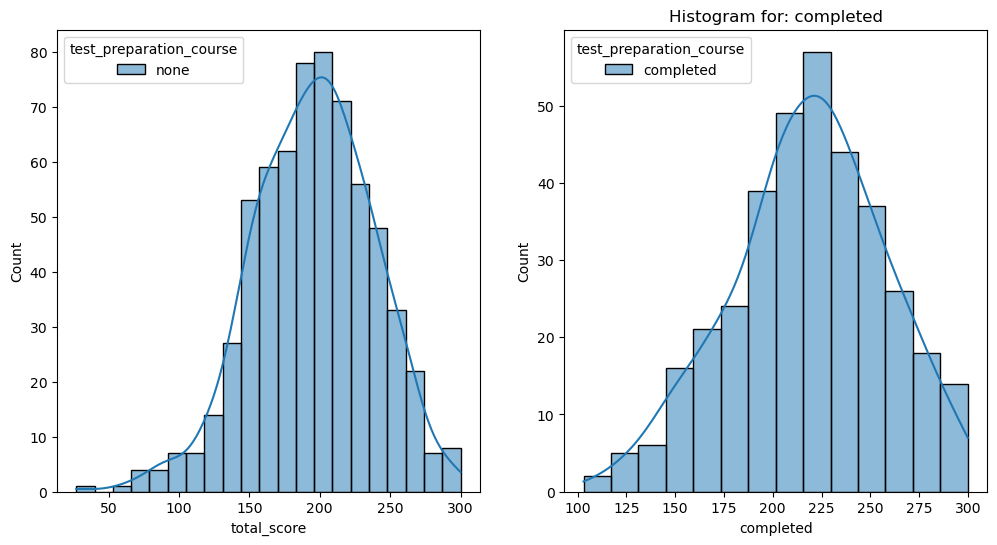

In [57]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x="average", kde=True,hue='test_preparation_course')

fig, axes = plt.subplots(1,2,figsize=(12,6))
for i, group in enumerate(df['test_preparation_course'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['test_preparation_course']==group], x="average", kde=True, ax=ax, hue='test_preparation_course')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()

print("========================================================================================================================")

plt.figure(figsize=(12,6))
sns.histplot(data=df, x="total_score", kde=True,hue='test_preparation_course')

fig, axes = plt.subplots(1,2 ,figsize=(12,6))
for i, group in enumerate(df['test_preparation_course'].unique()):
    ax = axes[i]
    sns.histplot(data=df[df['test_preparation_course']==group], x="total_score", kde=True, ax=ax, hue='test_preparation_course')
    plt.title(f"Histogram for: {group}")
    plt.xlabel(group)
plt.show()
    
    

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


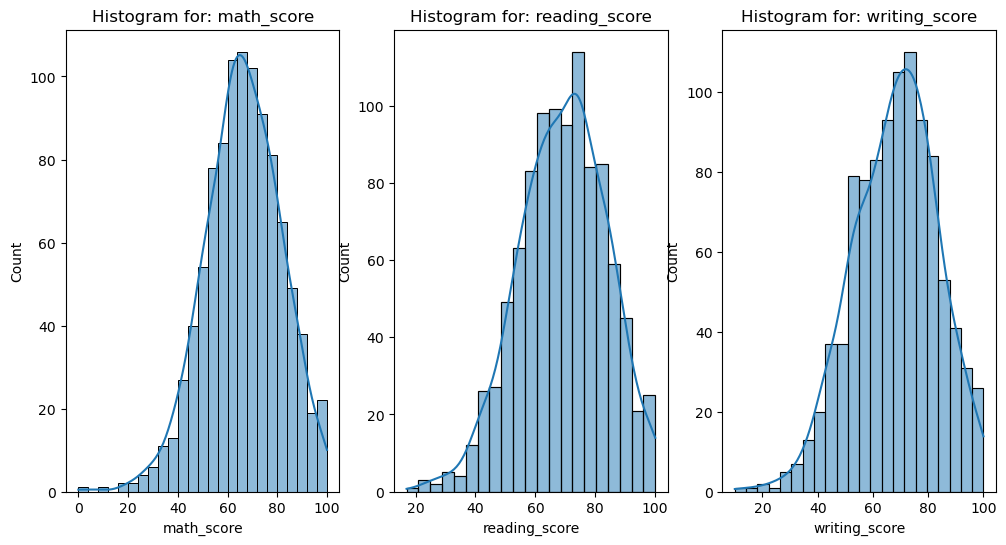

C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\1392512025.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature], kde=True,hist=False)
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\1392512025.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level functio

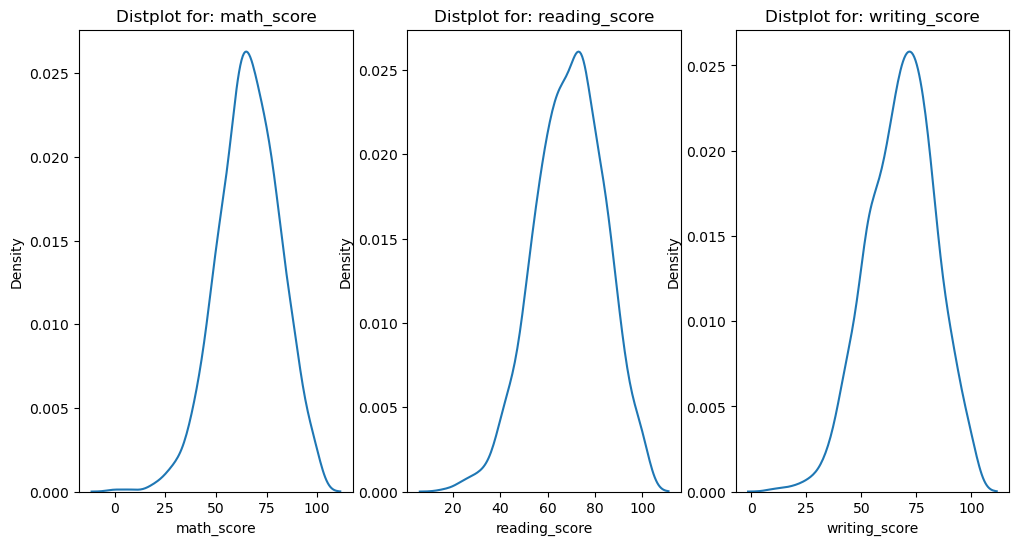

In [62]:
plt.figure(figsize=(12,6))
for i ,feature in enumerate(numerical_features):
    plt.subplot(1,3 , i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f"Histogram for: {feature}")
    plt.xlabel(feature)
plt.show()

print("=====================================================================================================================")

plt.figure(figsize=(12,6))
for i ,feature in enumerate(numerical_features):
    plt.subplot(1,3 , i+1)
    sns.distplot(df[feature], kde=True,hist=False)
    plt.title(f"Distplot for: {feature}")
    plt.xlabel(feature)
plt.show()



In [63]:
# univariente analysis for categorical features

Gender Distribution
gender
female    518
male      482
Name: count, dtype: int64
Distribution of Gender
gender
female    51.8
male      48.2
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\561806.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, gender_count[i], gender_count[i], ha='center',va='bottom')


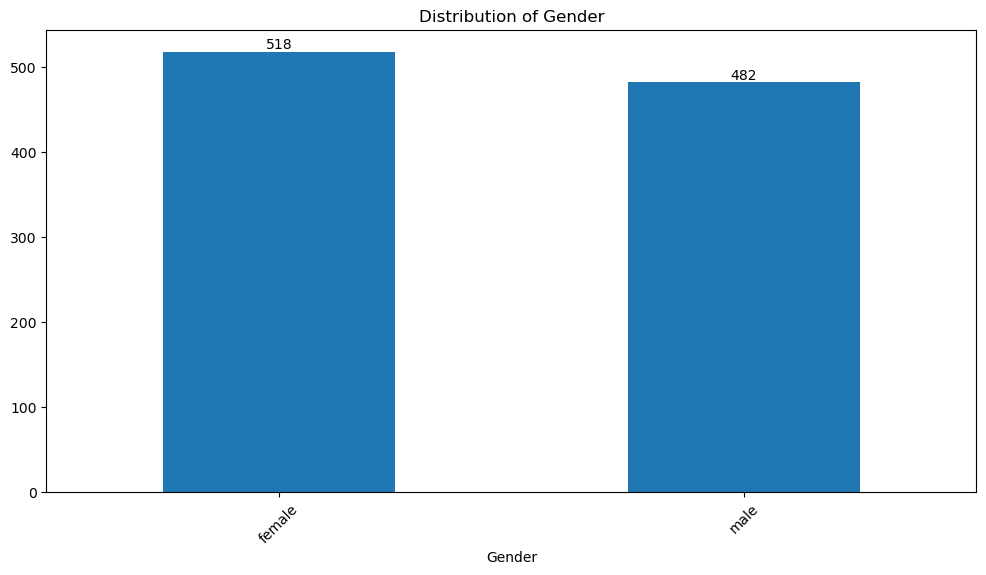

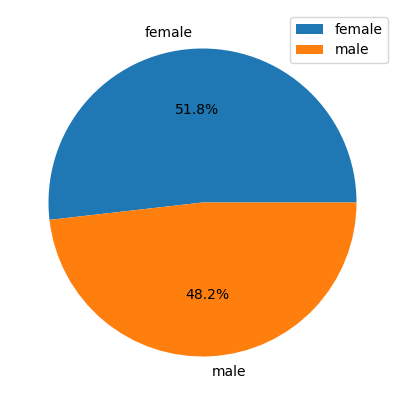

In [70]:
gender_count=df['gender'].value_counts()
gender_percentage =  gender_count/gender_count.sum()*100

print("Gender Distribution")
print(gender_count)
print("Distribution of Gender")
print(gender_percentage)


plt.figure(figsize=(12,6))
gender_count.plot(kind='bar')



for i in range(len(gender_count)):
    plt.text(i, gender_count[i], gender_count[i], ha='center',va='bottom')
    plt.title("Distribution of Gender")
    plt.xlabel("Gender")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


race_ethnicity Distribution
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
Distribution of race_ethnicity
race_ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\3073030537.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, race_ethnicity_count[i], race_ethnicity_count[i], ha='center',va='bottom')


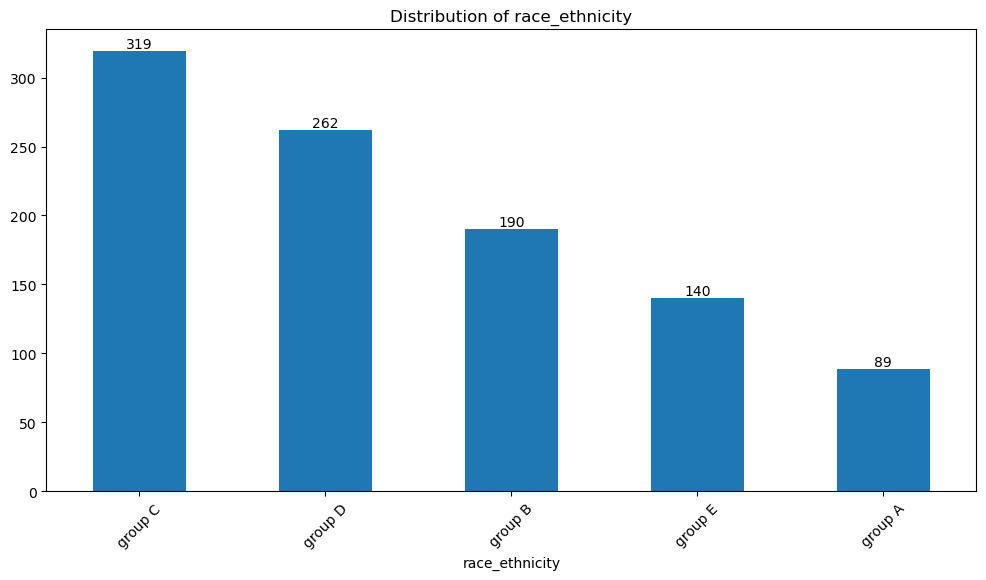

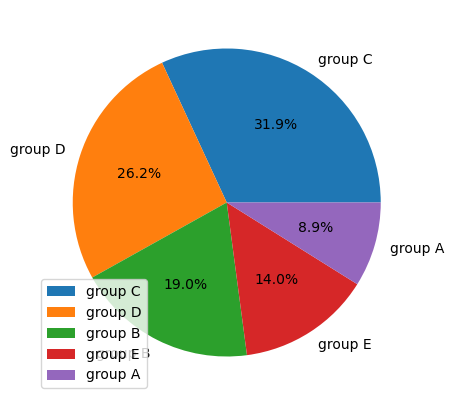

In [71]:
race_ethnicity_count=df['race_ethnicity'].value_counts()
race_ethnicity_percentage =  race_ethnicity_count/race_ethnicity_count.sum()*100

print("race_ethnicity Distribution")
print(race_ethnicity_count)
print("Distribution of race_ethnicity")
print(race_ethnicity_percentage)


plt.figure(figsize=(12,6))
race_ethnicity_count.plot(kind='bar')



for i in range(len(race_ethnicity_count)):
    plt.text(i, race_ethnicity_count[i], race_ethnicity_count[i], ha='center',va='bottom')
    plt.title("Distribution of race_ethnicity")
    plt.xlabel("race_ethnicity")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(race_ethnicity_count, labels=race_ethnicity_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


parental_level_of_education Distribution
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
Distribution of parental_level_of_education
parental_level_of_education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\1720383013.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, parental_level_of_education_count[i], parental_level_of_education_count[i], ha='center',va='bottom')


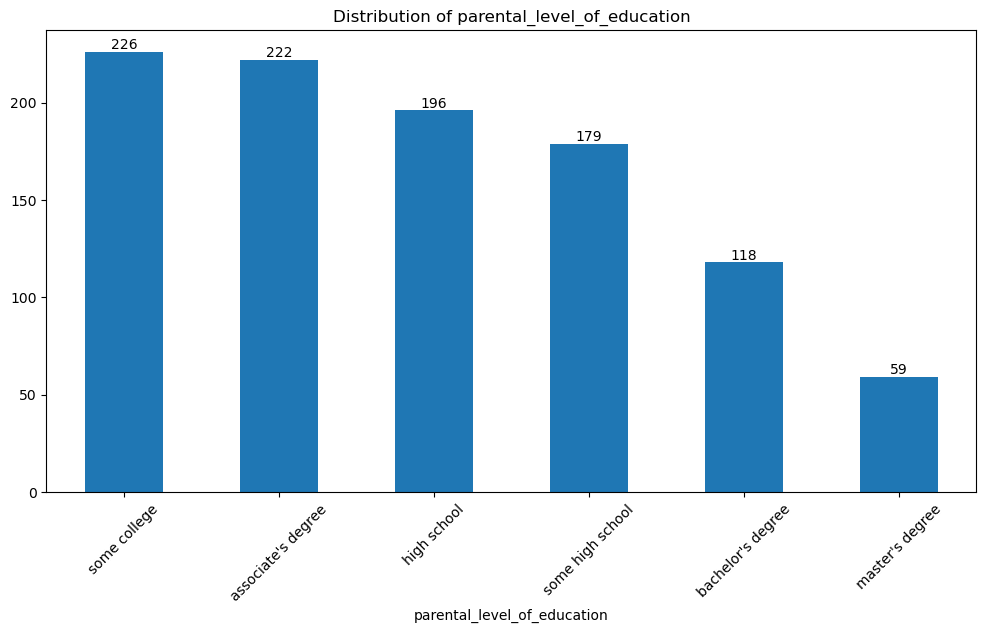

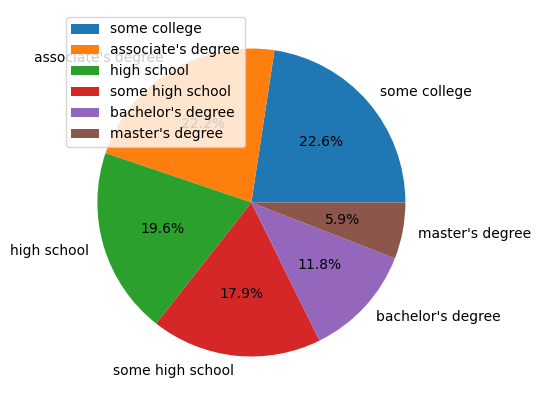

In [72]:
parental_level_of_education_count=df['parental_level_of_education'].value_counts()
parental_level_of_education_percentage =  parental_level_of_education_count/parental_level_of_education_count.sum()*100

print("parental_level_of_education Distribution")
print(parental_level_of_education_count)
print("Distribution of parental_level_of_education")
print(parental_level_of_education_percentage)


plt.figure(figsize=(12,6))
parental_level_of_education_count.plot(kind='bar')



for i in range(len(parental_level_of_education_count)):
    plt.text(i, parental_level_of_education_count[i], parental_level_of_education_count[i], ha='center',va='bottom')
    plt.title("Distribution of parental_level_of_education")
    plt.xlabel("parental_level_of_education")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(parental_level_of_education_count, labels=parental_level_of_education_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


lunch Distribution
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Distribution of lunch
lunch
standard        64.5
free/reduced    35.5
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\2644369663.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, lunch_count[i], lunch_count[i], ha='center',va='bottom')


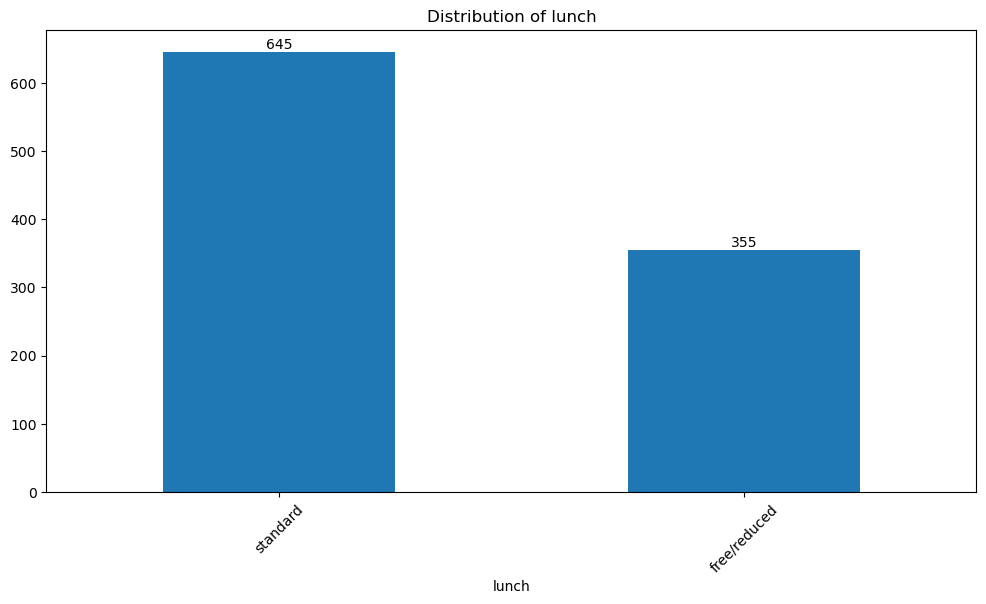

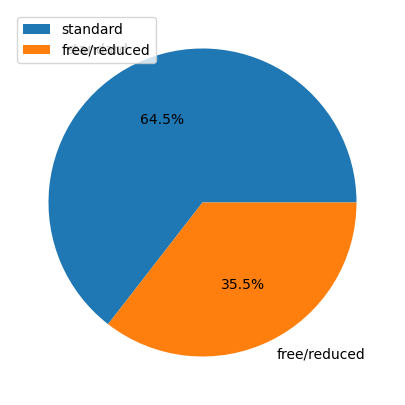

In [73]:
lunch_count=df['lunch'].value_counts()
lunch_percentage =  lunch_count/lunch_count.sum()*100

print("lunch Distribution")
print(lunch_count)
print("Distribution of lunch")
print(lunch_percentage)


plt.figure(figsize=(12,6))
lunch_count.plot(kind='bar')



for i in range(len(lunch_count)):
    plt.text(i, lunch_count[i], lunch_count[i], ha='center',va='bottom')
    plt.title("Distribution of lunch")
    plt.xlabel("lunch")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(lunch_count, labels=lunch_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


lunch Distribution
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
Distribution of lunch
lunch
standard        64.5
free/reduced    35.5
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\2644369663.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, lunch_count[i], lunch_count[i], ha='center',va='bottom')


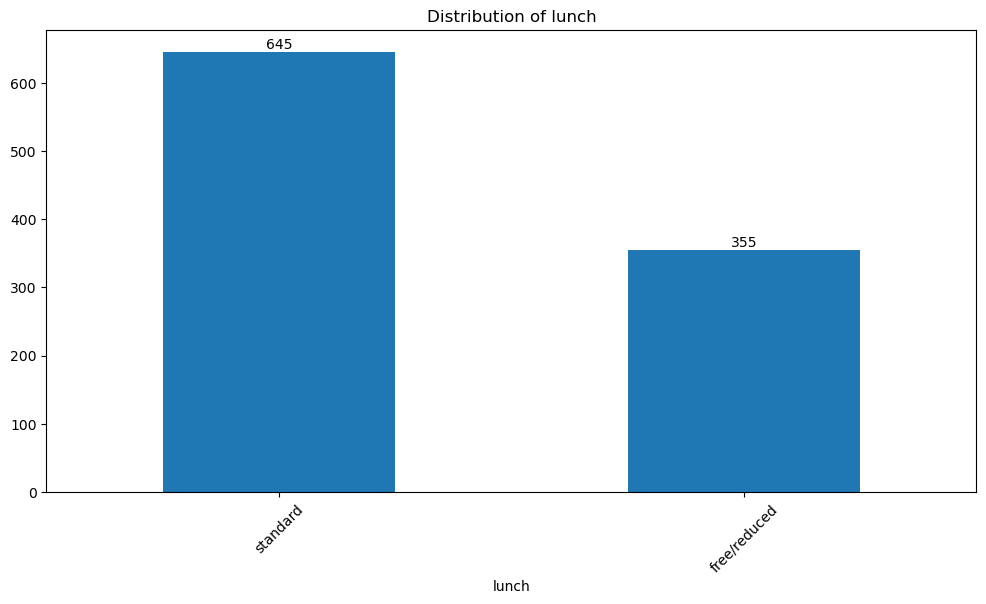

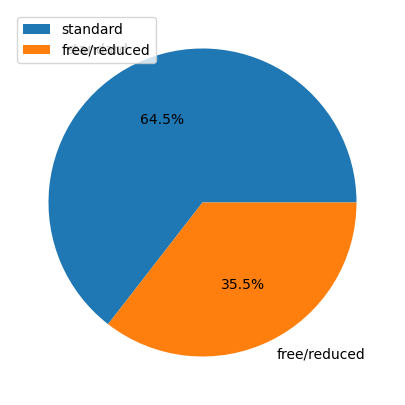

In [74]:
lunch_count=df['lunch'].value_counts()
lunch_percentage =  lunch_count/lunch_count.sum()*100

print("lunch Distribution")
print(lunch_count)
print("Distribution of lunch")
print(lunch_percentage)


plt.figure(figsize=(12,6))
lunch_count.plot(kind='bar')



for i in range(len(lunch_count)):
    plt.text(i, lunch_count[i], lunch_count[i], ha='center',va='bottom')
    plt.title("Distribution of lunch")
    plt.xlabel("lunch")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(lunch_count, labels=lunch_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


test_preparation_course Distribution
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
Distribution of test_preparation_course
test_preparation_course
none         64.2
completed    35.8
Name: count, dtype: float64


C:\Users\ramn\AppData\Local\Temp\ipykernel_4876\914444054.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, test_preparation_course_count[i], test_preparation_course_count[i], ha='center',va='bottom')


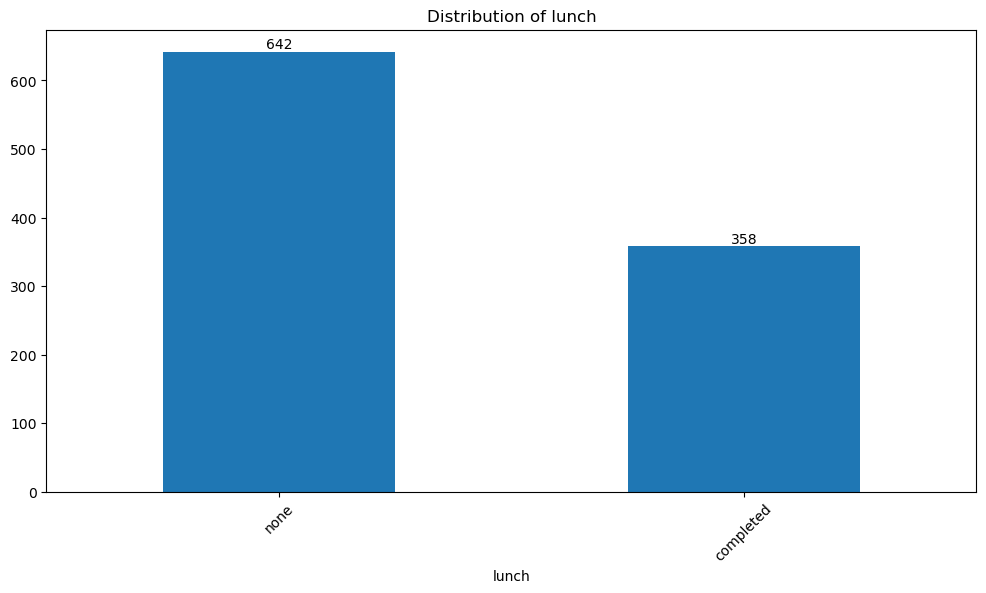

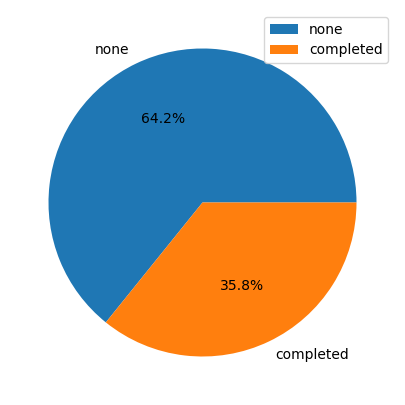

In [75]:
test_preparation_course_count=df['test_preparation_course'].value_counts()
test_preparation_course_percentage =  test_preparation_course_count/test_preparation_course_count.sum()*100

print("test_preparation_course Distribution")
print(test_preparation_course_count)
print("Distribution of test_preparation_course")
print(test_preparation_course_percentage)


plt.figure(figsize=(12,6))
test_preparation_course_count.plot(kind='bar')



for i in range(len(test_preparation_course_count)):
    plt.text(i, test_preparation_course_count[i], test_preparation_course_count[i], ha='center',va='bottom')
    plt.title("Distribution of lunch")
    plt.xlabel("lunch")
plt.xticks(rotation=45)

plt.show()


print("============================================================================================================")

plt.figure(figsize=(10,5))
plt.pie(test_preparation_course_count, labels=test_preparation_course_count.index, autopct="%1.1f%%")
plt.legend()
plt.show()


In [76]:
# Bivariente analysis for categorical features

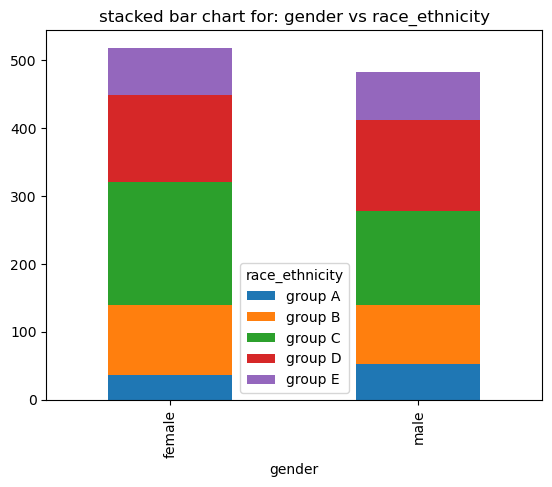

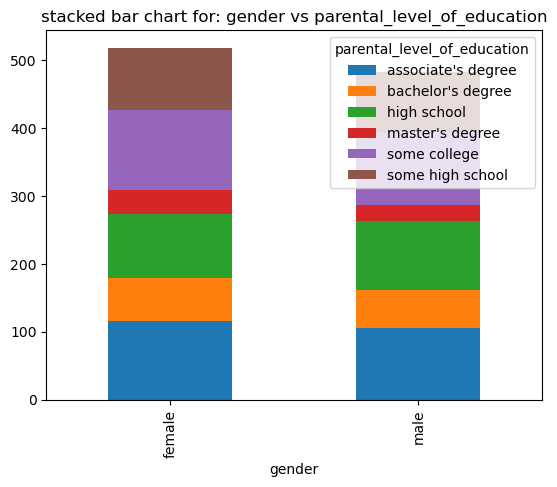

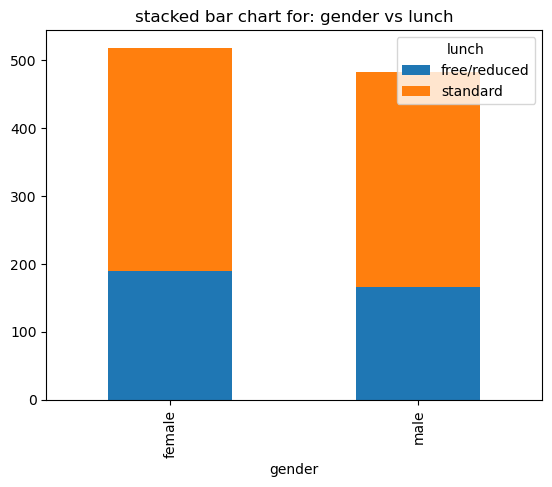

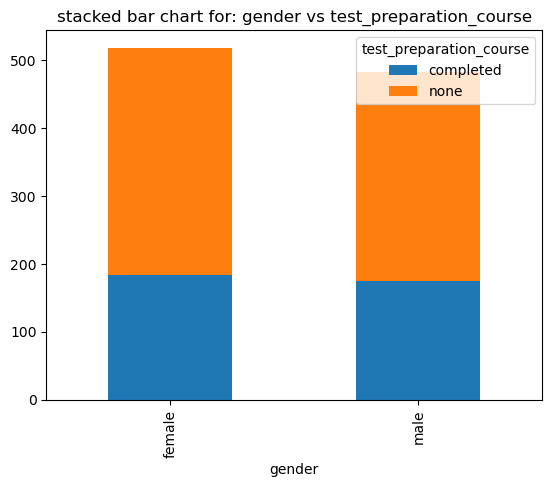

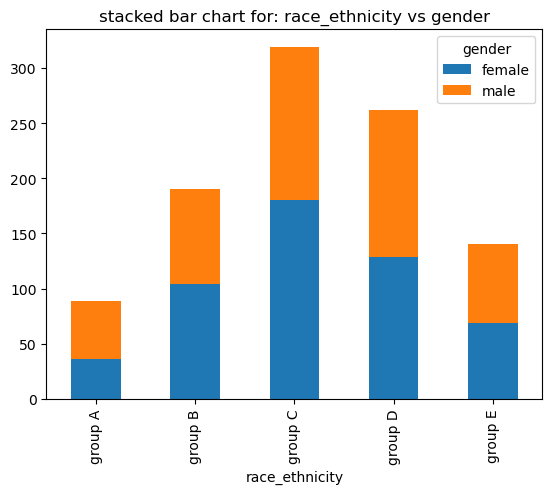

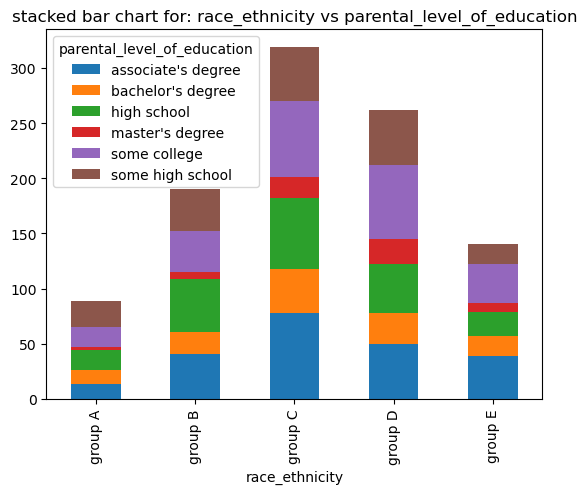

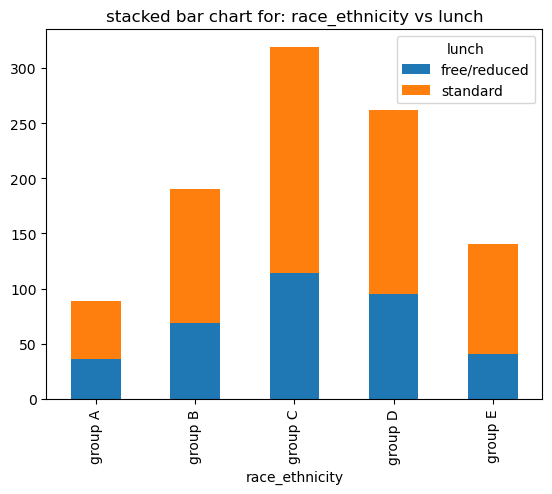

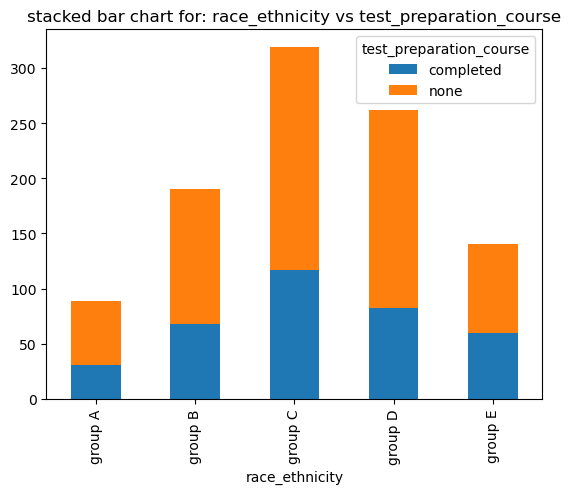

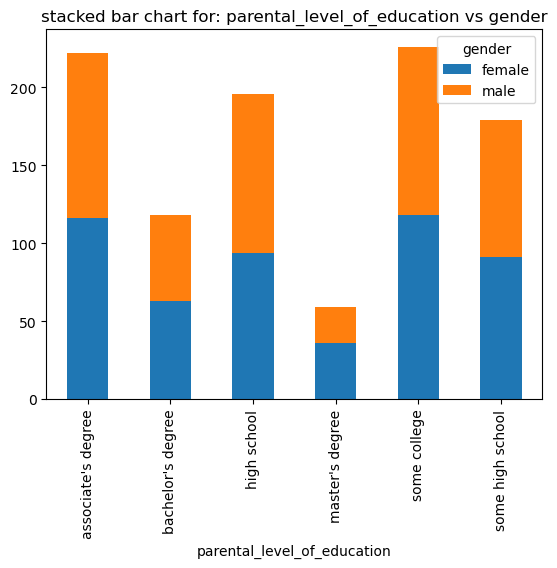

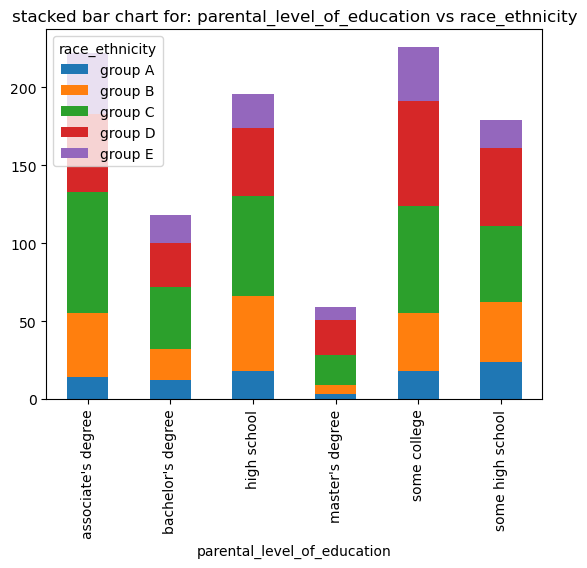

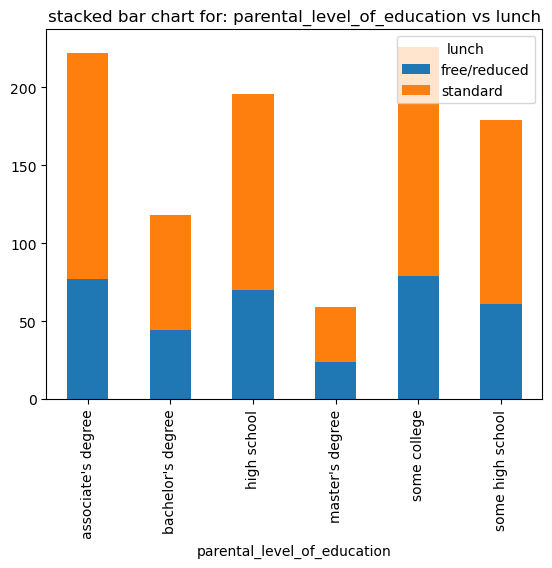

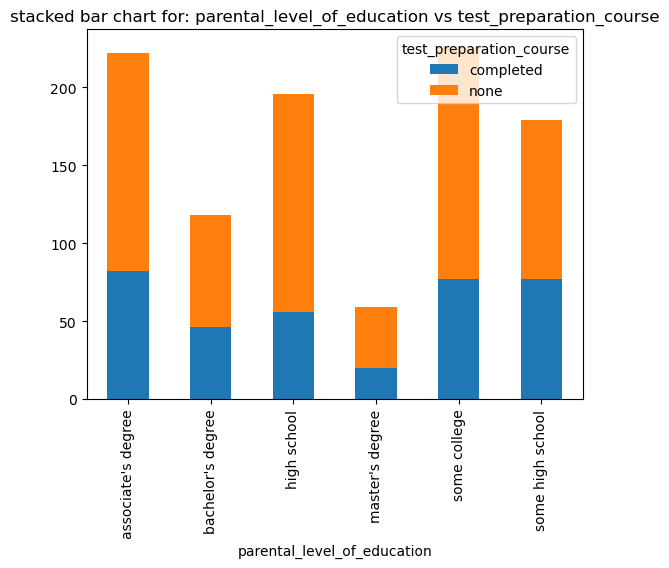

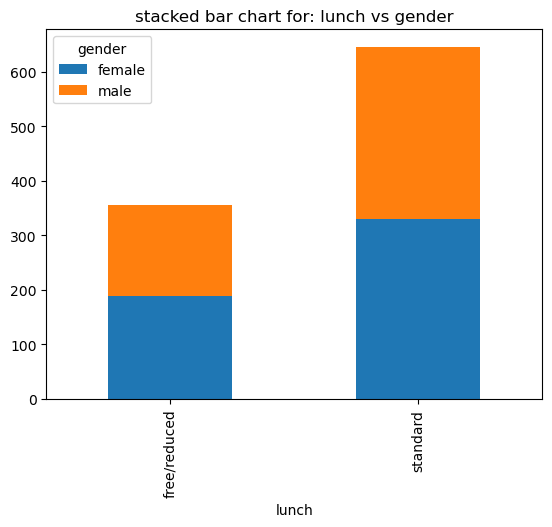

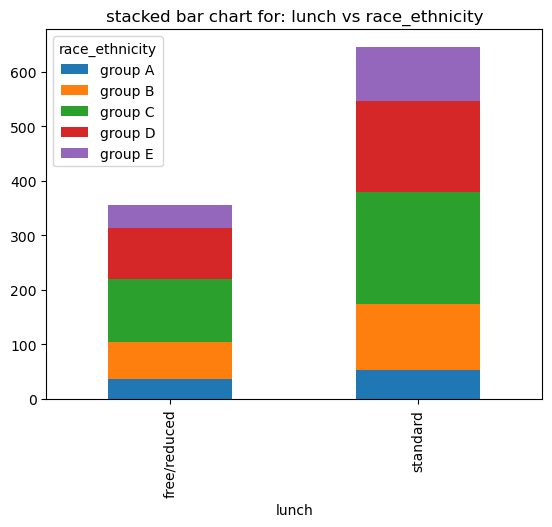

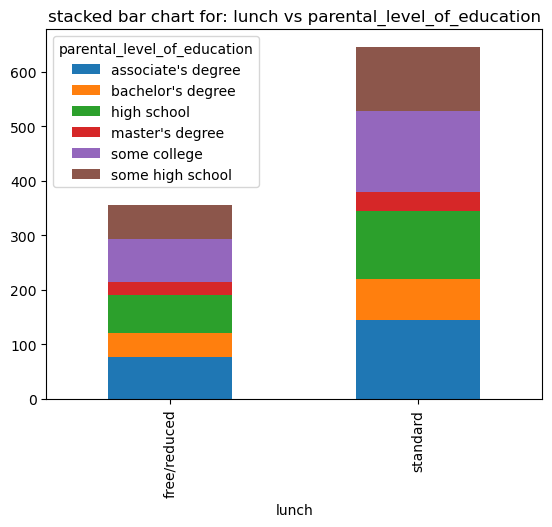

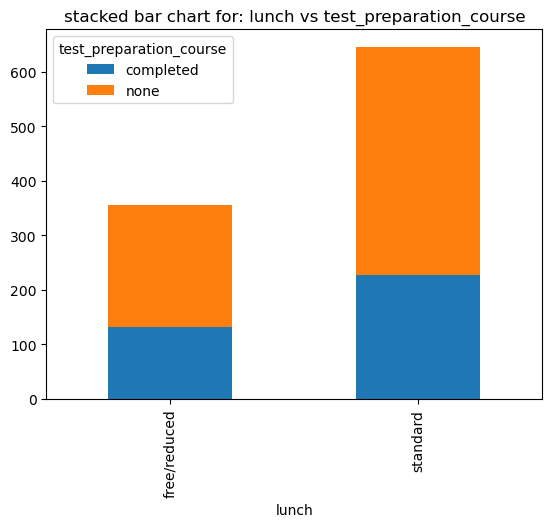

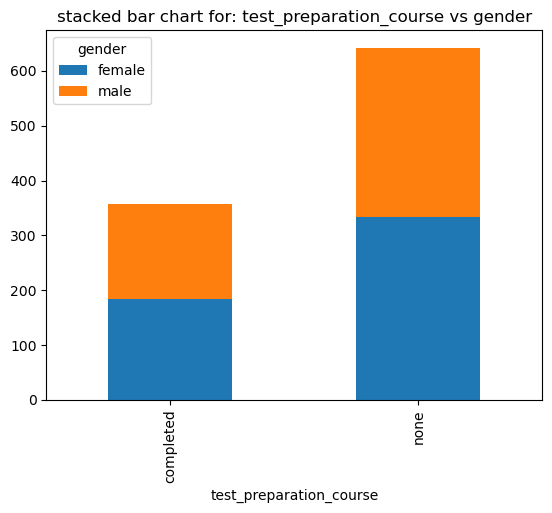

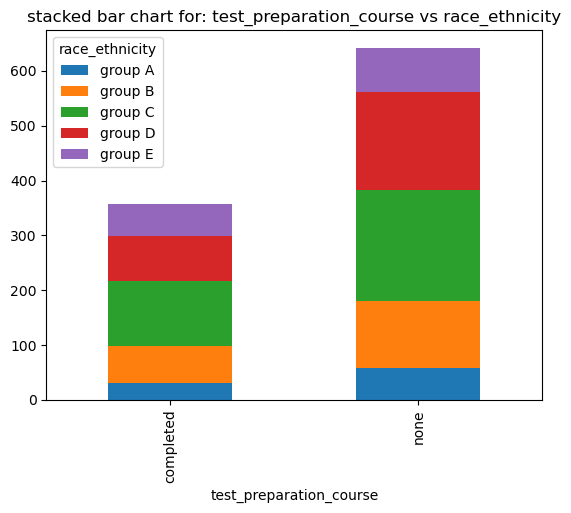

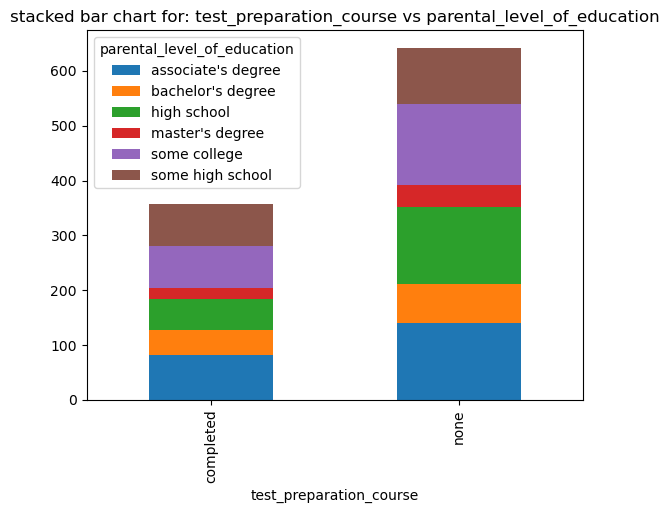

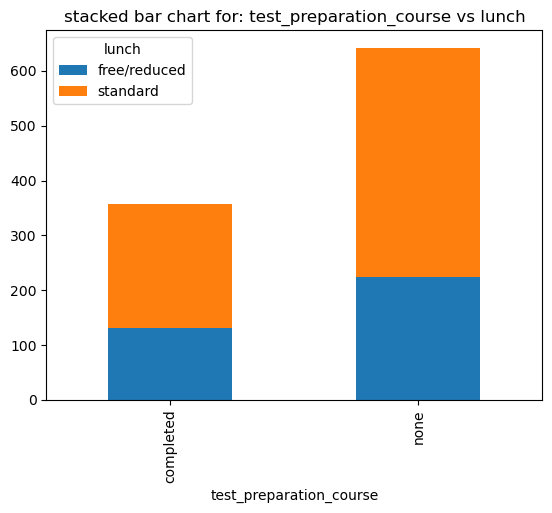

In [78]:
def stacked_bar_chart(feature1, feature2):
    stab = pd.crosstab(df[feature1], df[feature2])
    stab.plot(kind='bar', stacked=True)
    plt.title(f"stacked bar chart for: {feature1} vs {feature2}")
    plt.xlabel(feature1)



categorical_features = df[['gender','race_ethnicity','parental_level_of_education','lunch','test_preparation_course']]

for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            stacked_bar_chart(feature1, feature2)
            

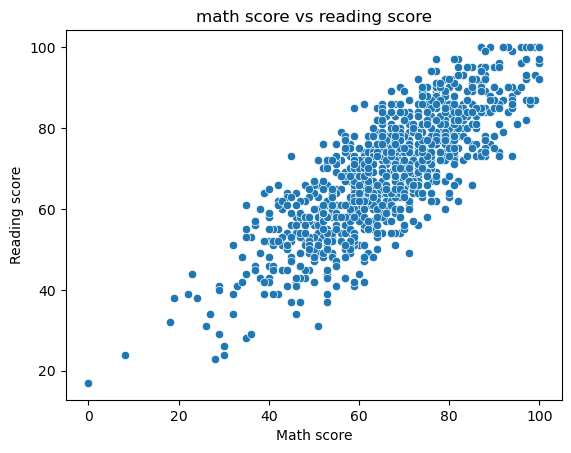

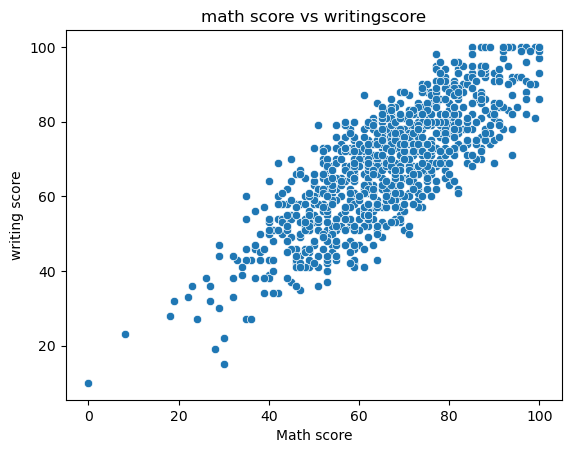

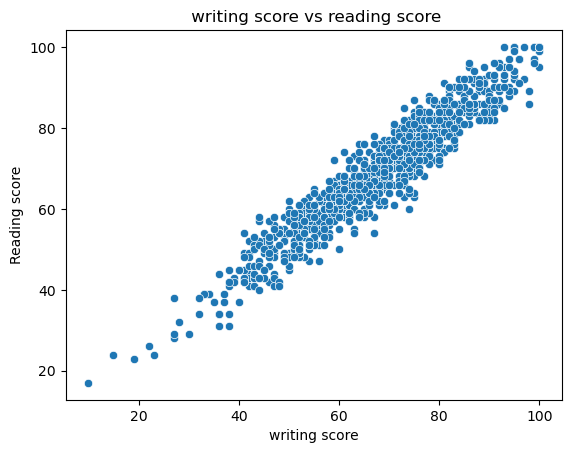

In [82]:
# math score vs reading score
sns.scatterplot(data=df,x="math_score", y='reading_score')
plt.title("math score vs reading score")
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.show()


# math score vs reading score
sns.scatterplot(data=df,x="math_score", y='writing_score')
plt.title("math score vs writingscore")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.show()



# writing score vs reading score
sns.scatterplot(data=df,x="writing_score", y='reading_score')
plt.title(" writing score vs reading score")
plt.xlabel("writing score")
plt.ylabel("Reading score")
plt.show()

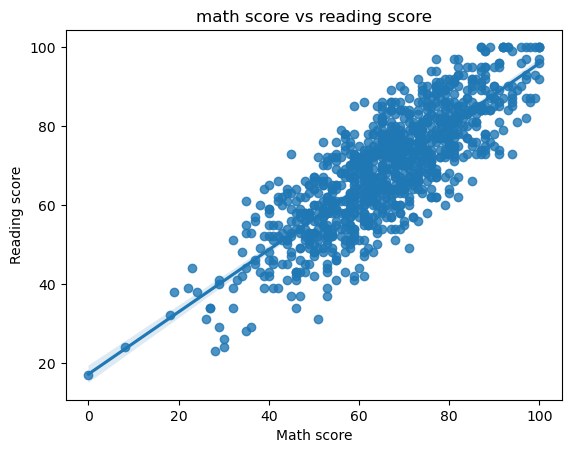

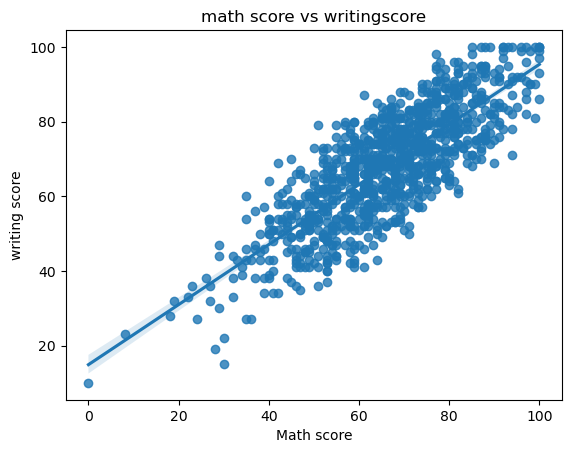

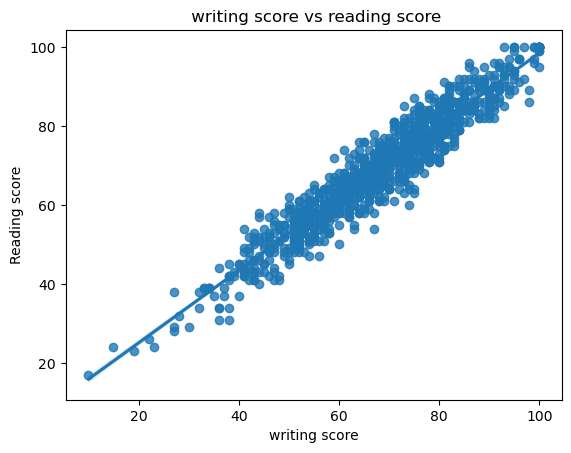

In [83]:
# math score vs reading score
sns.regplot(data=df,x="math_score", y='reading_score')
plt.title("math score vs reading score")
plt.xlabel("Math score")
plt.ylabel("Reading score")
plt.show()


# math score vs reading score
sns.regplot(data=df,x="math_score", y='writing_score')
plt.title("math score vs writingscore")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.show()



# writing score vs reading score
sns.regplot(data=df,x="writing_score", y='reading_score')
plt.title(" writing score vs reading score")
plt.xlabel("writing score")
plt.ylabel("Reading score")
plt.show()

In [84]:
# chi square test 

In [85]:
from scipy.stats import chi2_contingency

In [87]:
for feature1 in categorical_features:
    for feature2 in categorical_features:
        if feature1 != feature2:
            contigency_table = pd.crosstab(df[feature1],df[feature2])
            chi2,p,_,_ = chi2_contingency(contigency_table)
            print(f"chi square test between: {feature1}  and {feature2}")
            print(f"Statatics test for: {chi2}")
            print(f"p_value: {p}\n ")
            

chi square test between: gender  and race_ethnicity
Statatics test for: 9.02738626908596
p_value: 0.06041858784847785
 
chi square test between: gender  and parental_level_of_education
Statatics test for: 3.384904766004173
p_value: 0.6408699721807456
 
chi square test between: gender  and lunch
Statatics test for: 0.37173802316040705
p_value: 0.5420584175146086
 
chi square test between: gender  and test_preparation_course
Statatics test for: 0.015529201882465888
p_value: 0.9008273880804724
 
chi square test between: race_ethnicity  and gender
Statatics test for: 9.02738626908596
p_value: 0.06041858784847785
 
chi square test between: race_ethnicity  and parental_level_of_education
Statatics test for: 29.45866151909779
p_value: 0.07911304840592065
 
chi square test between: race_ethnicity  and lunch
Statatics test for: 3.4423502326273185
p_value: 0.48669808284196503
 
chi square test between: race_ethnicity  and test_preparation_course
Statatics test for: 5.4875148857070695
p_value: 0.

In [88]:
# multivariete analysis for categorical features

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


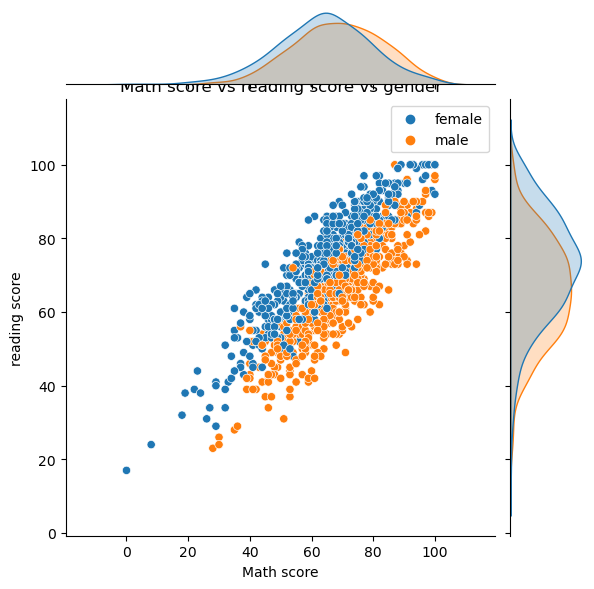

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


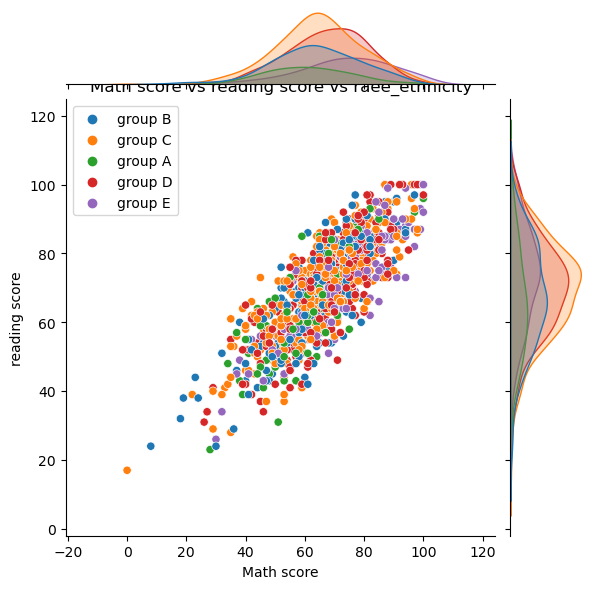

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


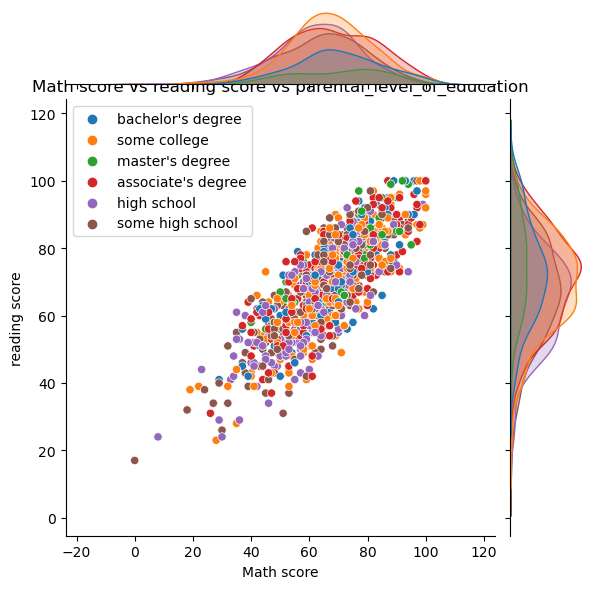

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


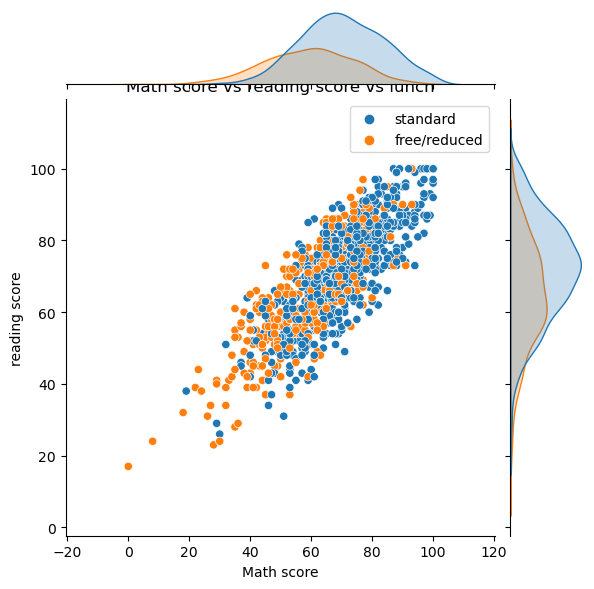

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


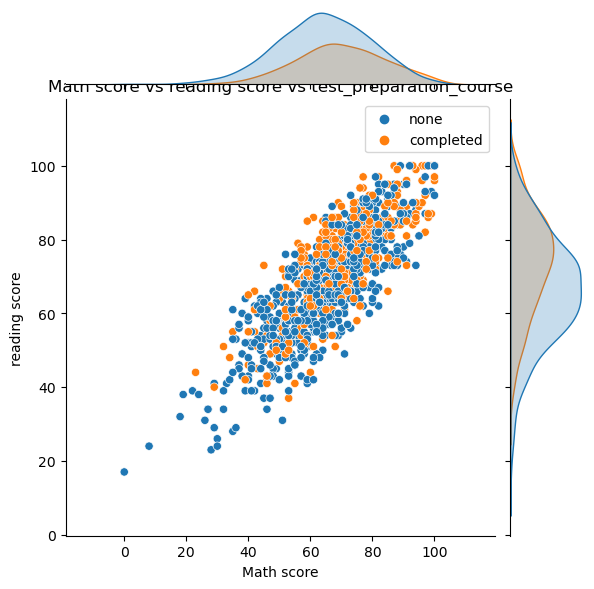

In [96]:
# math score vs reading score vs gender
sns.jointplot(data=df, x="math_score", y="reading_score", hue='gender')

plt.title("Math score vs reading score vs gender")
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend()
plt.show()


# math score vs reading score vs race ethnicity
sns.jointplot(data=df, x="math_score", y="reading_score", hue='race_ethnicity')

plt.title("Math score vs reading score vs raee_ethnicity")
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend()
plt.show()


# math score vs reading score vs parental level of education
sns.jointplot(data=df, x="math_score", y="reading_score", hue='parental_level_of_education')

plt.title("Math score vs reading score vs parental_level_of_education")
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend()
plt.show()



# math score vs reading score vs lunch
sns.jointplot(data=df, x="math_score", y="reading_score", hue='lunch')

plt.title("Math score vs reading score vs lunch")
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend()
plt.show()



# math score vs reading score vs test test preparation course
sns.jointplot(data=df, x="math_score", y="reading_score", hue='test_preparation_course')

plt.title("Math score vs reading score vs test_preparation_course")
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.legend()
plt.show()

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


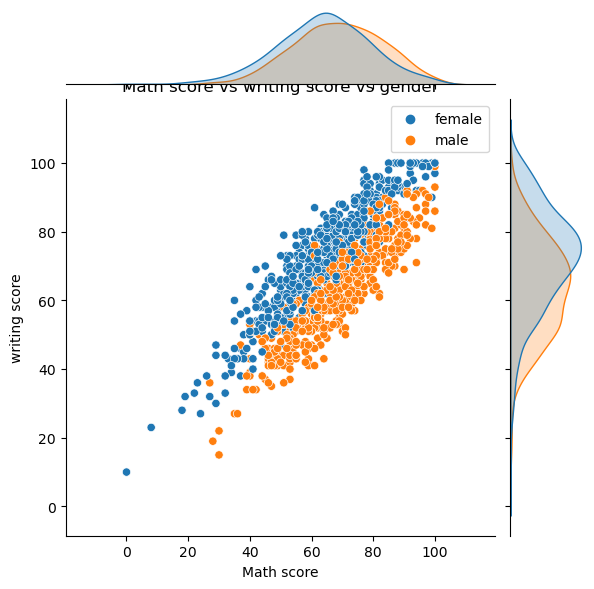

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


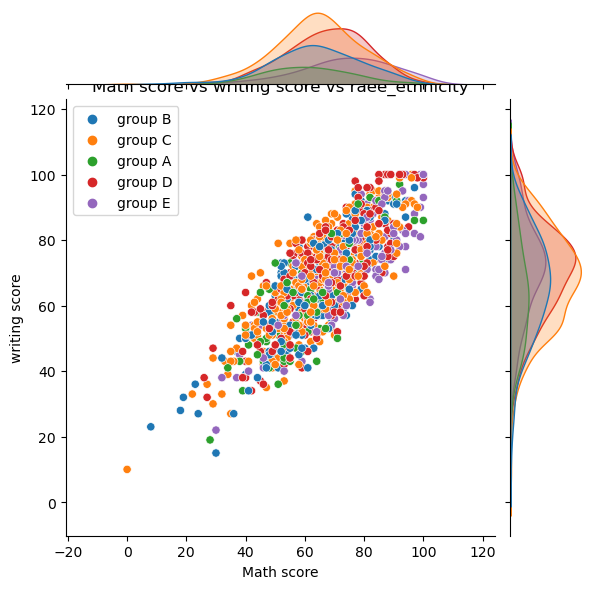

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


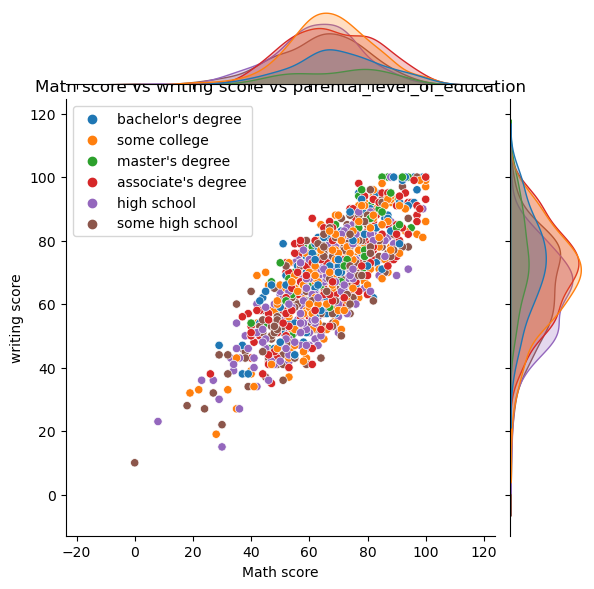

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


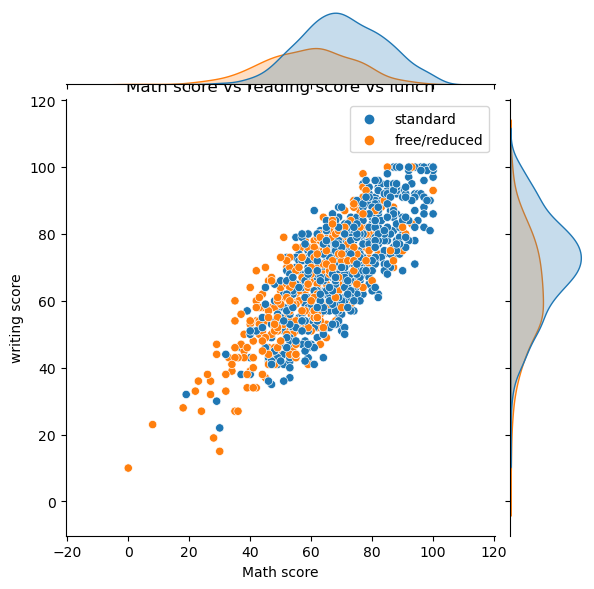

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


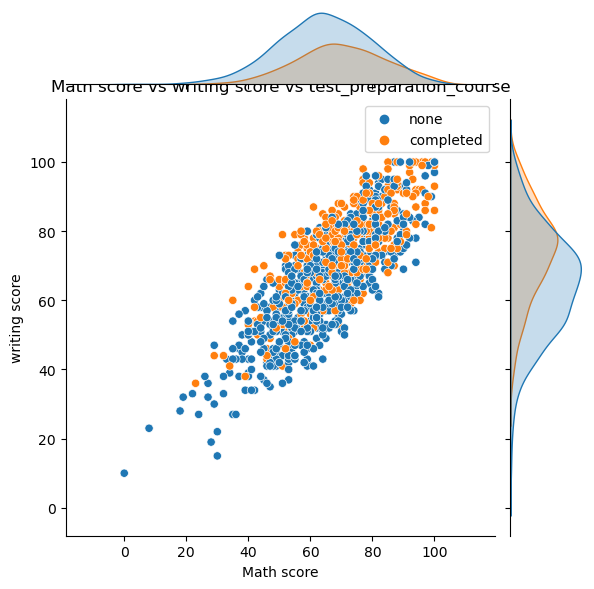

In [97]:
# math score vs writing score vs gender
sns.jointplot(data=df, x="math_score", y="writing_score", hue='gender')

plt.title("Math score vs writing score vs gender")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.legend()
plt.show()


# math score vs reading score vs race ethnicity
sns.jointplot(data=df, x="math_score", y="writing_score", hue='race_ethnicity')

plt.title("Math score vs writing score vs raee_ethnicity")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.legend()
plt.show()


# math score vs reading score vs parental level of education
sns.jointplot(data=df, x="math_score", y="writing_score", hue='parental_level_of_education')

plt.title("Math score vs writing score vs parental_level_of_education")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.legend()
plt.show()



# math score vs reading score vs lunch
sns.jointplot(data=df, x="math_score", y="writing_score", hue='lunch')

plt.title("Math score vs reading score vs lunch")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.legend()
plt.show()



# math score vs reading score vs test test preparation course
sns.jointplot(data=df, x="math_score", y="writing_score", hue='test_preparation_course')

plt.title("Math score vs writing score vs test_preparation_course")
plt.xlabel("Math score")
plt.ylabel("writing score")
plt.legend()
plt.show()

C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ramn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

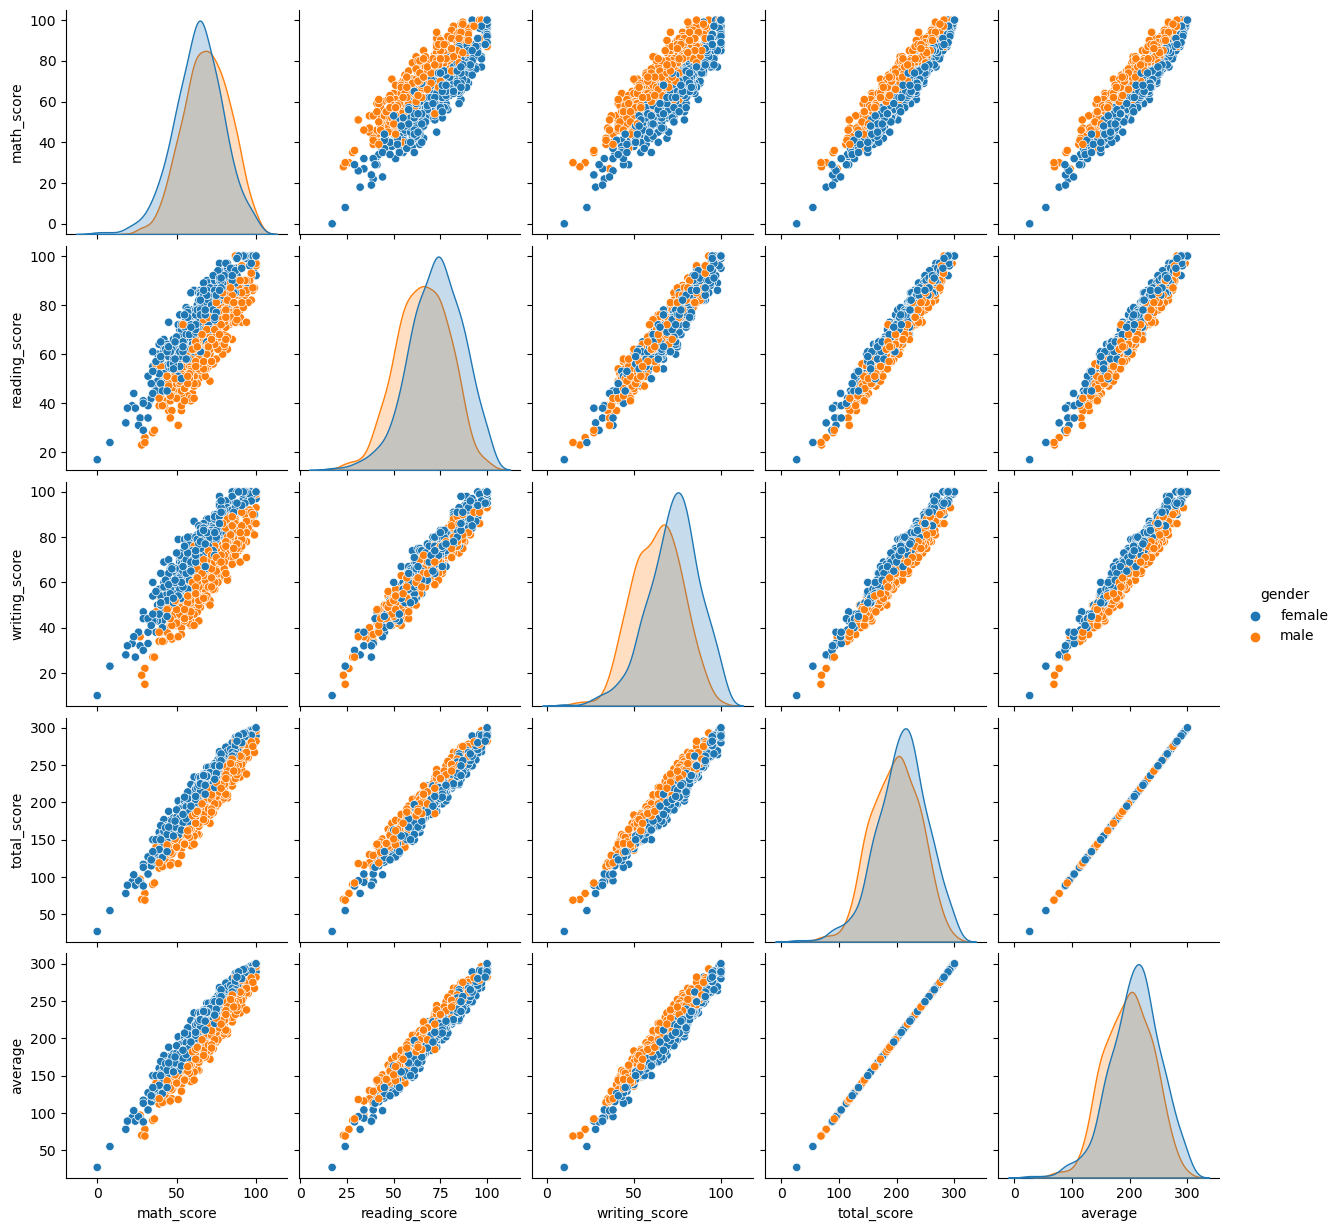

In [101]:
sns.pairplot(df,hue='gender')